# Understanding Car Insurance Premiums

**Q1. )** What columns from this data set are most predictive of premium amounts?

**Q2. )** Can we use ML to determine which demographic of people are more likely to have higher premiums?

## EDA

This section of the project is going to go over the exploration of this data. This is going to include the checking the data for nulls and general cleanliness of the data.

In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the csv
df = pd.read_csv('Auto_Insurance_Claims_Sample.csv')

In [3]:
# Show all the columns in the dataframe
pd.set_option('display.max_columns', None)
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Check the dataframe shape
df.shape

(9134, 26)

In [5]:
# Check to see if there are any duplicated rows in the dataset
df.Customer.unique().shape

(9134,)

#### Good size data set for the project. 26 columns is a good starting point. Some columns need to be removed since they cannot be converted to numerical. Other columns will need to be modified in order to work with the models.

In [6]:
# Check for nulls
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### The data is clean and there are no missing values in this data set.

In [7]:
# Check the data types
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [8]:
# Just another way to check the data set for nulls and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [9]:
# Some basic statistical information for this data set
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
# Checking the value counts for some of the columns
df.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [11]:
# Checking the value counts for some of the columns
df.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [12]:
# Checking the value counts for some of the columns
df.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [13]:
# Checking the value counts for some of the columns
df.EmploymentStatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [14]:
# Set up a for loop to run through columns to check the different categories 
for i in df.columns[1:]:
    print(df[i].value_counts())

US    9134
Name: Country, dtype: int64
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
472.686933     6
272.535640     6
575.744226     6
592.672938     6
1216.874492    6
              ..
919.868511     1
287.543239     1
623.430592     1
910.389970     1
816.951398     1
Name: Claim Amount, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    1

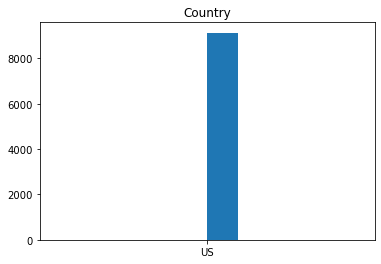

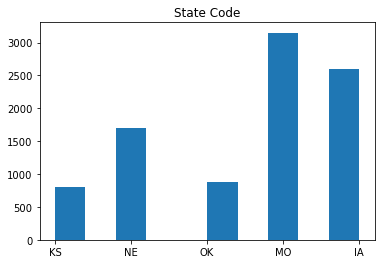

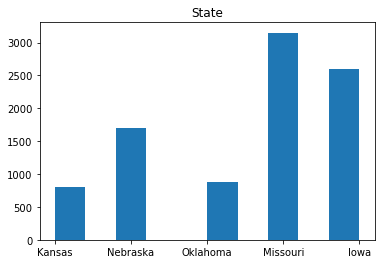

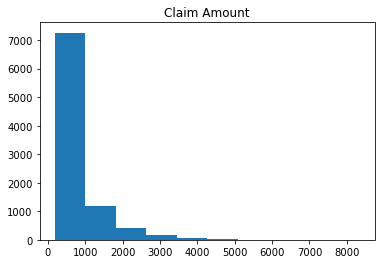

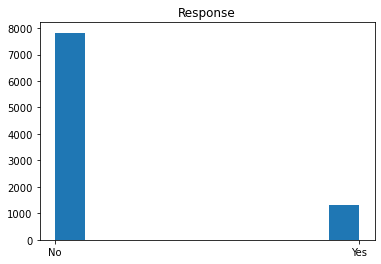

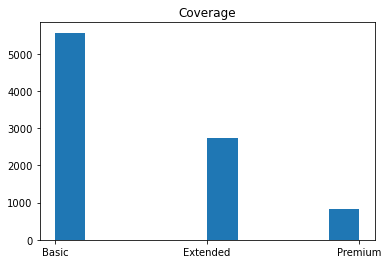

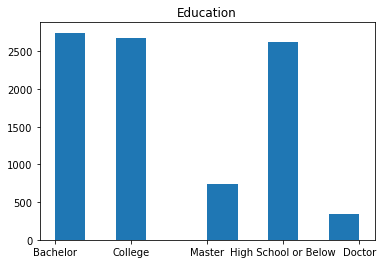

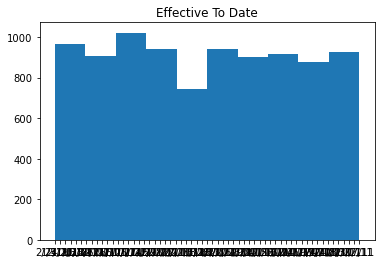

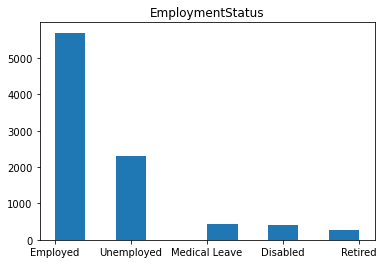

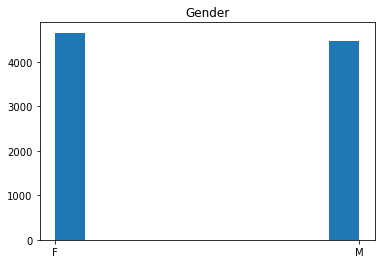

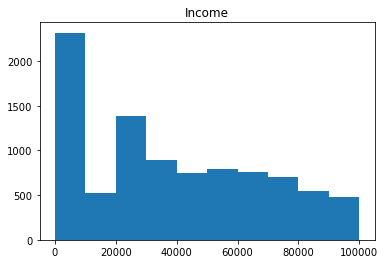

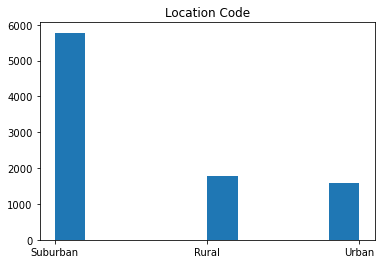

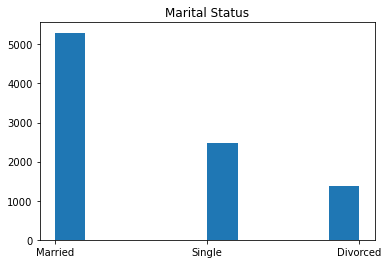

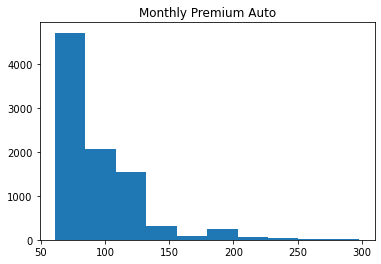

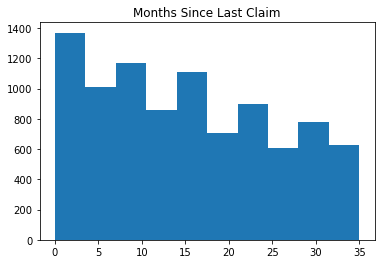

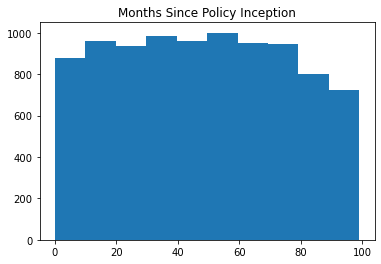

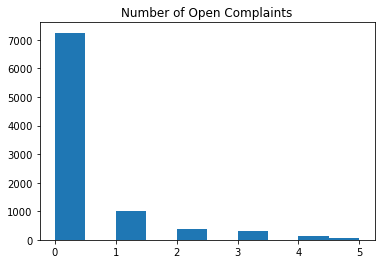

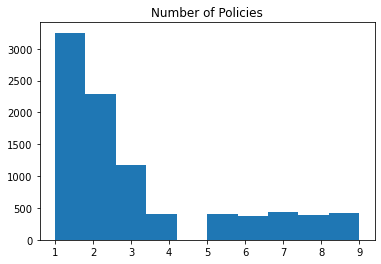

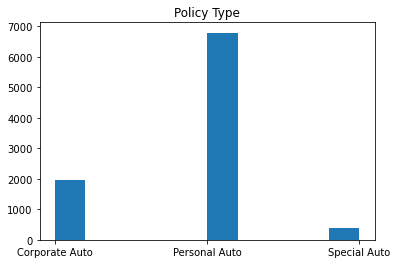

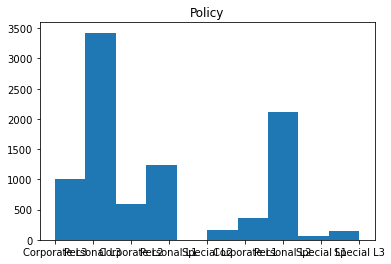

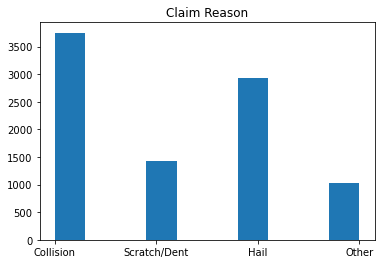

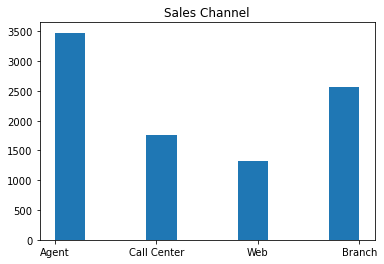

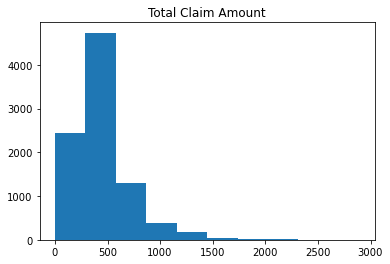

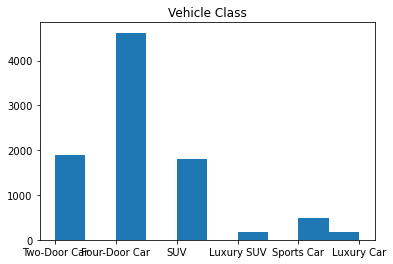

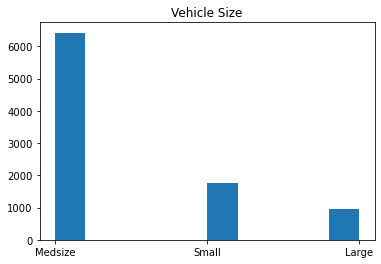

In [15]:
'''
Set up a for loop to run through columns to check the different categories and graph it. 
This makes it easier to visualize than above
'''
for i in df.columns[1:]:
    plt.figure()
    plt.hist(df[i])
    plt.title(i)
    plt.show()

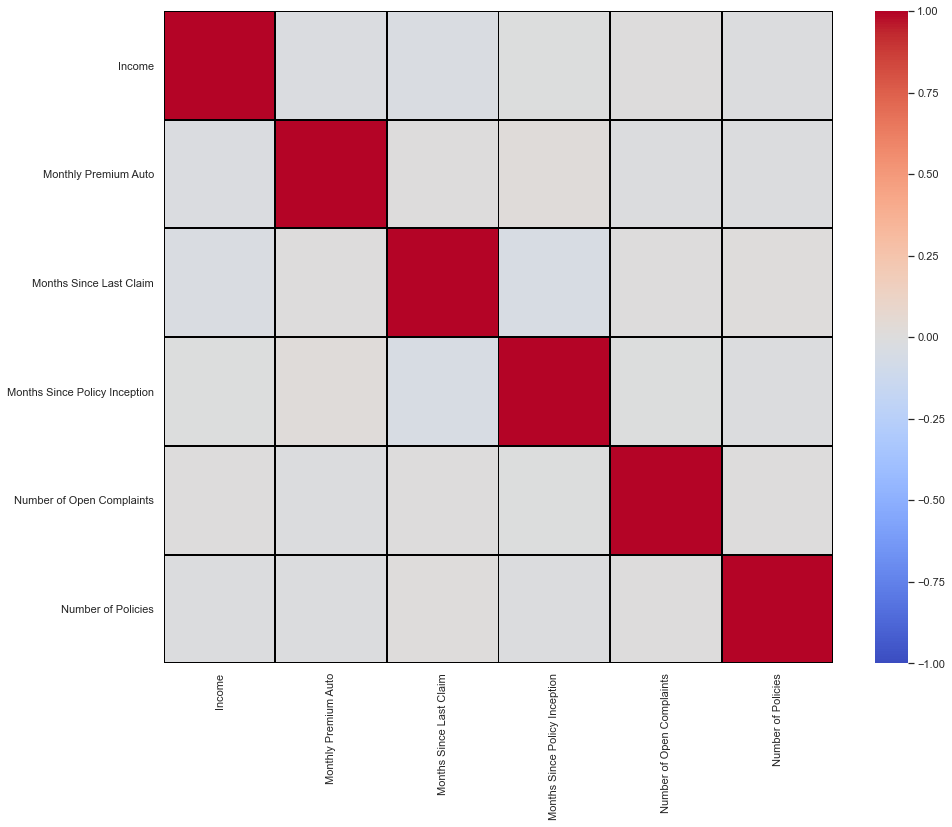

In [17]:
'''
Let us check for multicolinearity in the data set.
'''
#numerical col for this dataset
num_col=df.loc[:,df.dtypes == int ]
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(num_col.corr(),vmin= -1, vmax = 1, center = 0, cmap = 'coolwarm', linewidths = 1, linecolor = 'black');

#### There is not a strong correlation between any of the numerical columns in this data set. We can now proceed to the next step.

### Feature Analysis

Let's go through each future and discuss its importance and relevance to the question asked. In some cases, the details of the column are unknown. In such cases, a decision will be made on the path forwards of the column.

The target column is the monthly premium auto. That column will be transformed into high premium (1) vs low premium (0). This makes the most sense for this data because there can be clearly two distinct divisions made with this column. There is no need to have a multi-classification for this target column. Numeric columns will be binned based on high/low thresholds. Finally, the rest of the data that can be converted to numerical data will be converted using OHE and used for the modeling.

### Drop the columns that are not necessary for the analysis 

1. The customer columns will be dropped because the indexes can be used as the unique identifier for each row.

2. The country can be dropped since the data is from one country.

3. One of either the State Code or State can be dropped because these are the same things.

4. Response will be dropped because I do not know what the column represents.

5. Policy type will be dropped because it is similar to policy but includes less information.


In [18]:
# Drop the columns mentioned above.

df.drop(['Customer','Country','State Code','Response','Policy Type'], axis = 1, inplace = True)

In [19]:
# Check the new dataframe after the above columns have been dropped
df.head()

,State,Claim Amount,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [20]:
# Let us convert the `Effective to Date` column into datetime

df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [21]:
#  Don't Pull out the year because there is no variance in year
        #df['Effective To Year'] = df['Effective To Date'].dt.year
# Pull out the month
df['Effective To Month'] = df['Effective To Date'].dt.month
# Pull out the day
df['Effective To Day'] = df['Effective To Date'].dt.day


# Change the newly created columns to int

df['Effective To Month'].astype(int)
df['Effective To Day'].astype(int)

0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: Effective To Day, Length: 9134, dtype: int64

In [22]:
# Check the dataframe
df.head()

,State,Claim Amount,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day
0,Kansas,276.351928,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,2,24
1,Nebraska,697.953590,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,Oklahoma,1288.743165,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,2,19
3,Missouri,764.586183,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,1,20
4,Kansas,281.369258,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,2,3


In [23]:
# Drop the Effective to Date column

df.drop('Effective To Date', axis = 1, inplace = True)

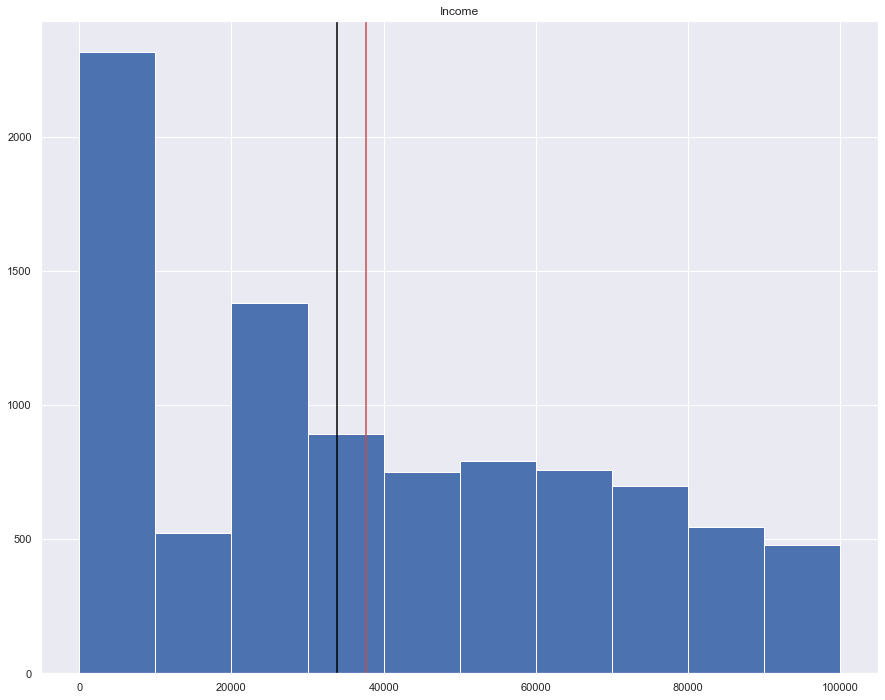

 Income Mean : 37657.38
 Income Median : 33889.50


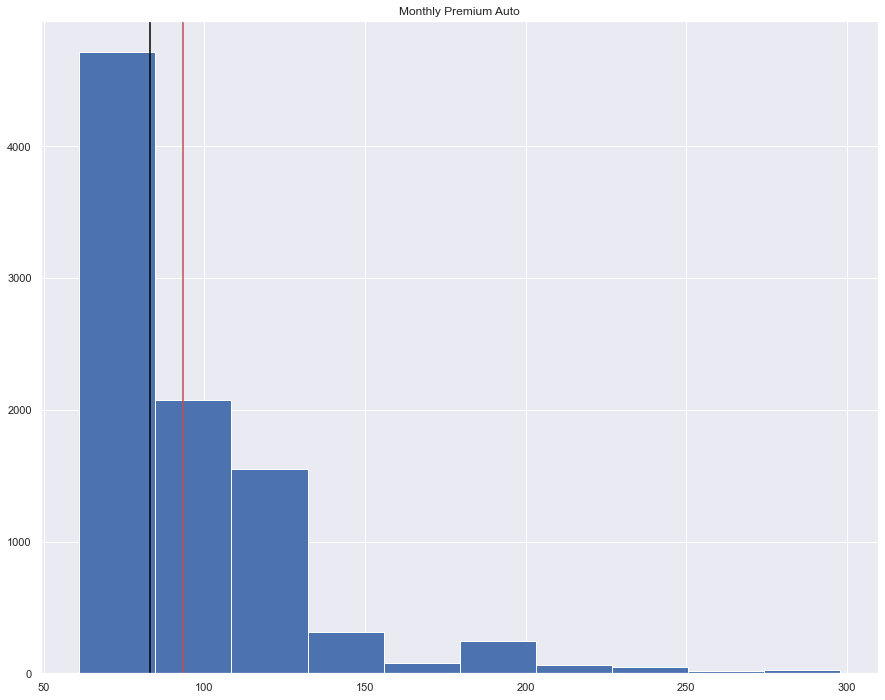

 Monthly Premium Auto Mean : 93.22
 Monthly Premium Auto Median : 83.00


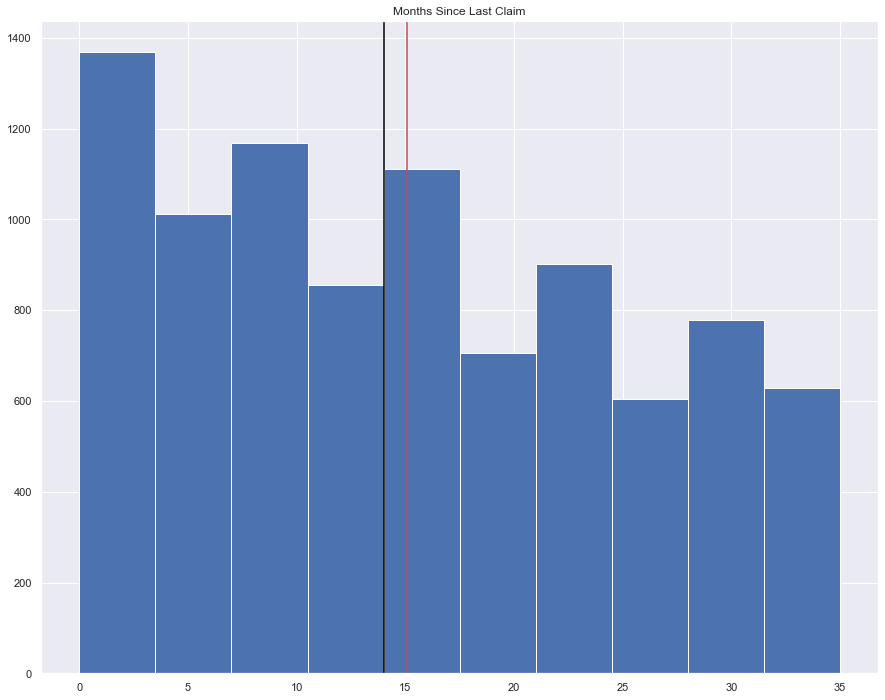

 Months Since Last Claim Mean : 15.10
 Months Since Last Claim Median : 14.00


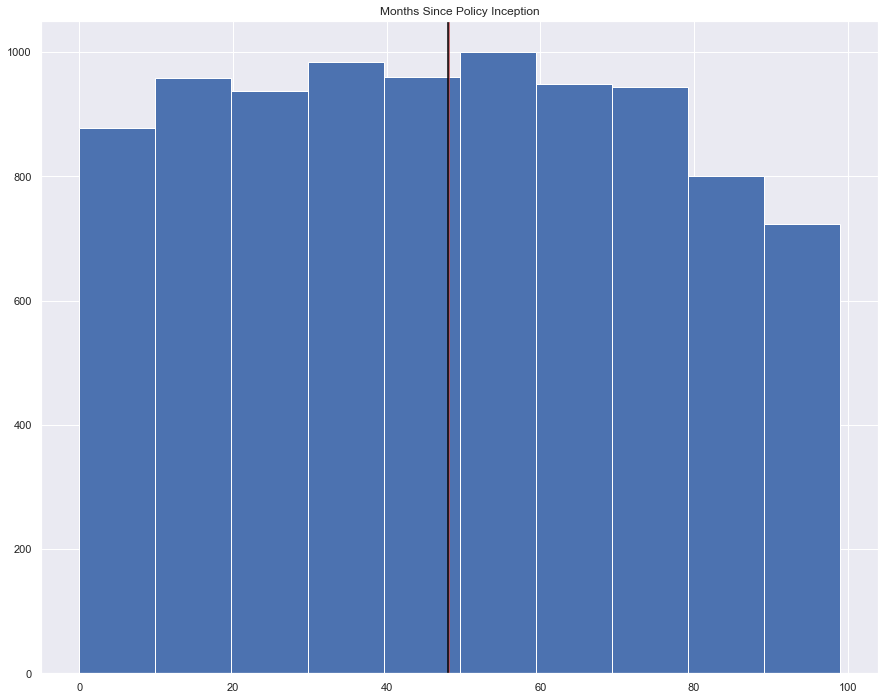

 Months Since Policy Inception Mean : 48.06
 Months Since Policy Inception Median : 48.00


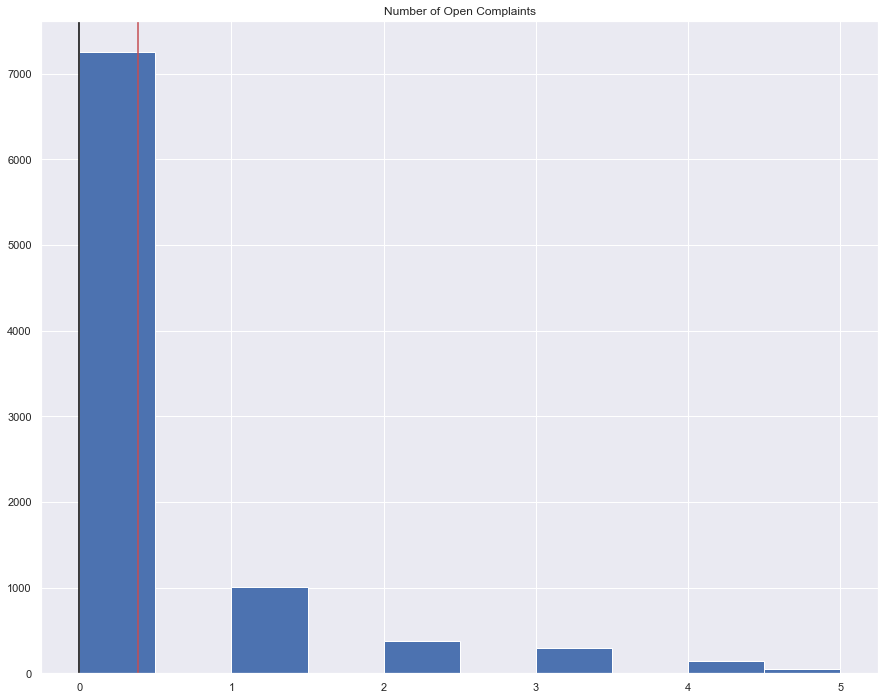

 Number of Open Complaints Mean : 0.38
 Number of Open Complaints Median : 0.00


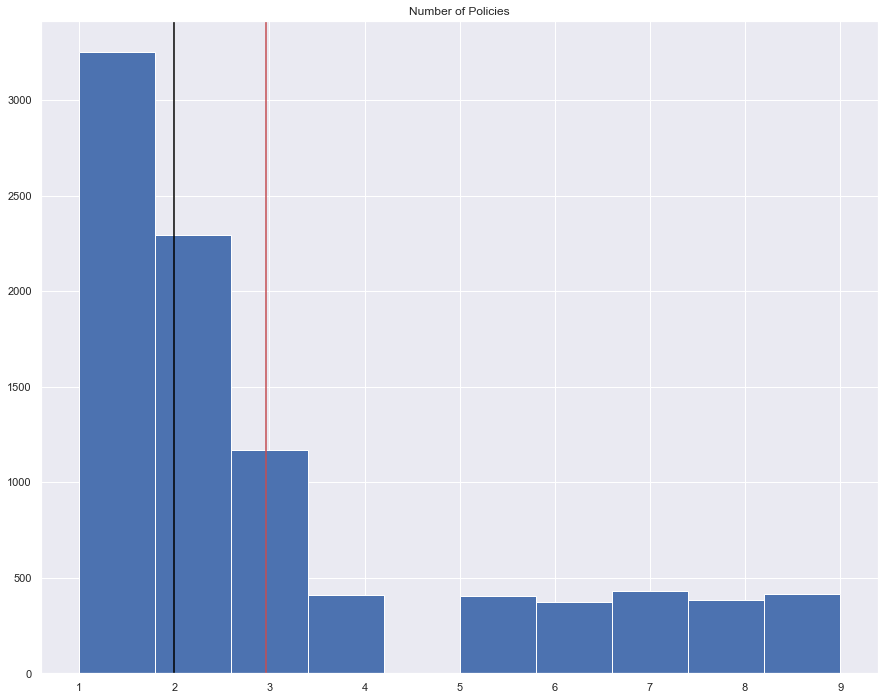

 Number of Policies Mean : 2.97
 Number of Policies Median : 2.00


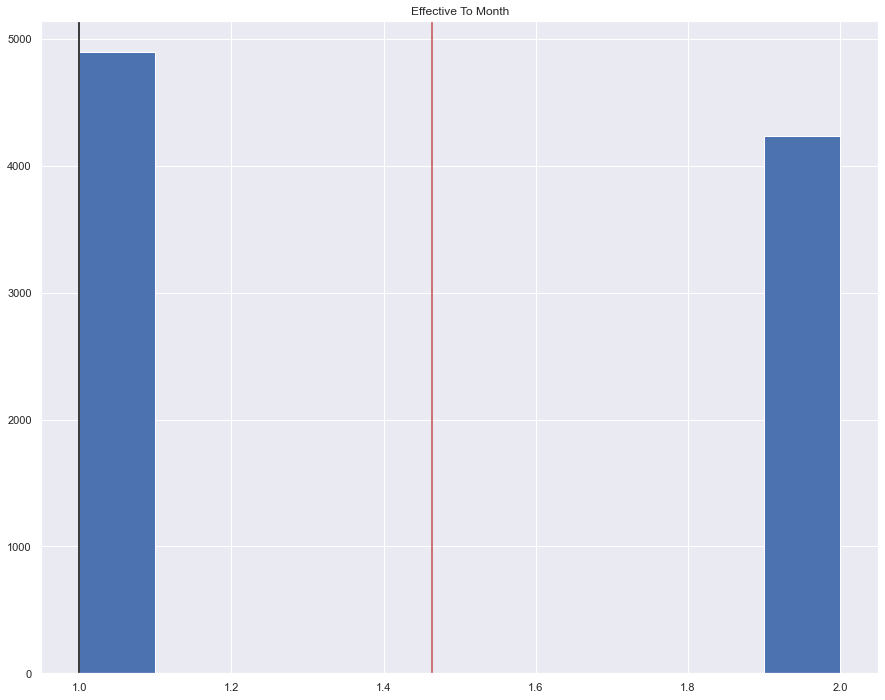

 Effective To Month Mean : 1.46
 Effective To Month Median : 1.00


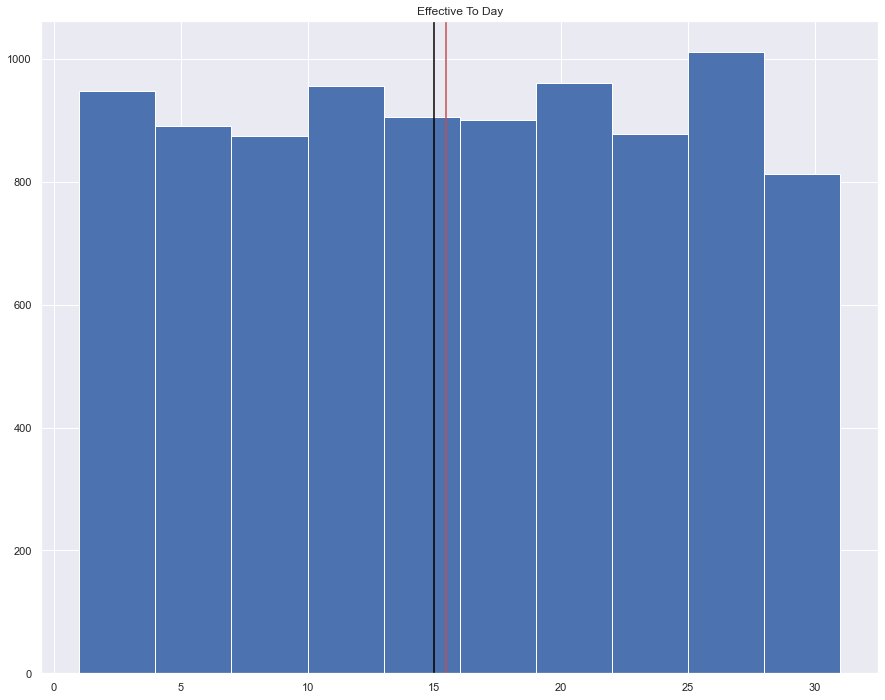

 Effective To Day Mean : 15.46
 Effective To Day Median : 15.00


In [26]:
# Check the distribution of the inlcuding the mean and median of the numeric columns in the dataframe
for i in df.columns: 
    if df[i].dtype == int:
        plt.figure()
        plt.hist(df[i])
        plt.title(i)
        plt.axvline(df[i].mean(), c= 'r')
        plt.axvline(df[i].median(), c = 'black')
        plt.show()
        print(f' {i} Mean : {df[i].mean():0.2f}')
        print(f' {i} Median : {df[i].median():0.2f}')

#### Target column is the `Monthly Premium Auto`. That column will be transformed into high premium (1) vs low premium (0). 

In [27]:
# Split it on the median because the mean will distribute the positive and negative class more evenly.
df['Monthly Premium Auto'] = np.where(df['Monthly Premium Auto'] > 83.0 , 1, 0)

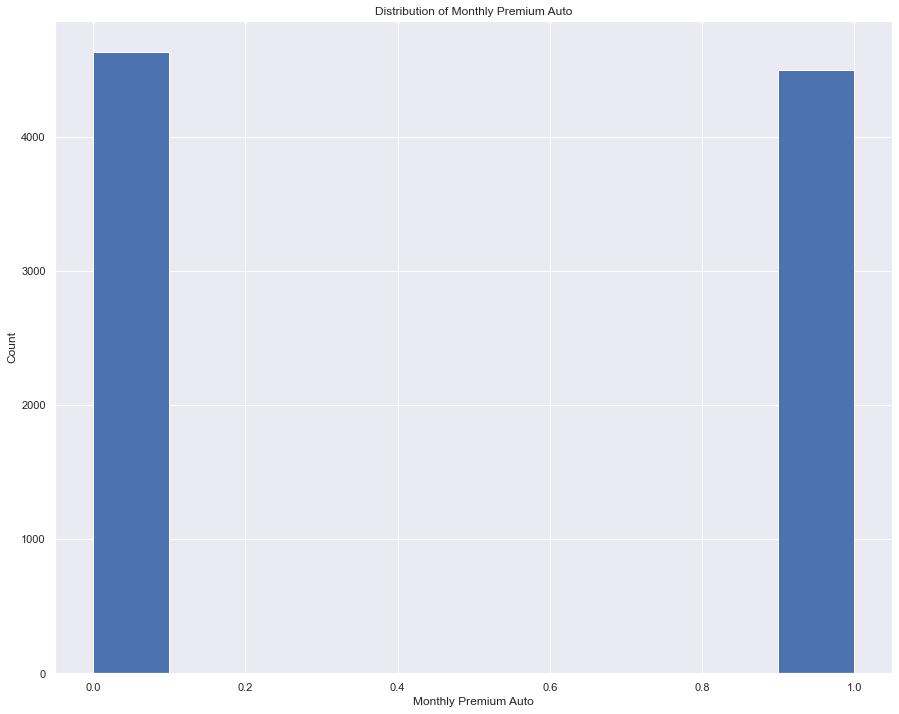

 The Percent of High Premiums in the Monthly Premium Auto Column:  49.28% 


In [28]:
# check the distribution of the the target column
premium = df['Monthly Premium Auto']

plt.figure()
plt.hist(df['Monthly Premium Auto'])
plt.title('Distribution of Monthly Premium Auto')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Count')
plt.show()

print(f' The Percent of High Premiums in the Monthly Premium Auto Column: {premium.mean()*100: 0.2f}% ')

#### Fortunately, after binning the data, we have a balance between high and low premiums.

In [29]:
# We've done a lot of work to this dataframe so let us look at the changes so far.
df.head()

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day
0,Kansas,276.351928,Basic,Bachelor,Employed,F,56274,Suburban,Married,0,32,5,0,1,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,2,24
1,Nebraska,697.953590,Extended,Bachelor,Unemployed,F,0,Suburban,Single,1,13,42,0,8,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,Oklahoma,1288.743165,Premium,Bachelor,Employed,F,48767,Suburban,Married,1,18,38,0,2,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,2,19
3,Missouri,764.586183,Basic,Bachelor,Unemployed,M,0,Suburban,Married,1,18,65,0,7,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,1,20
4,Kansas,281.369258,Basic,Bachelor,Employed,M,43836,Rural,Single,0,12,44,0,1,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,2,3


Convert the rest of the numerical column ( that makes sense to bin) into their respective high low bins.

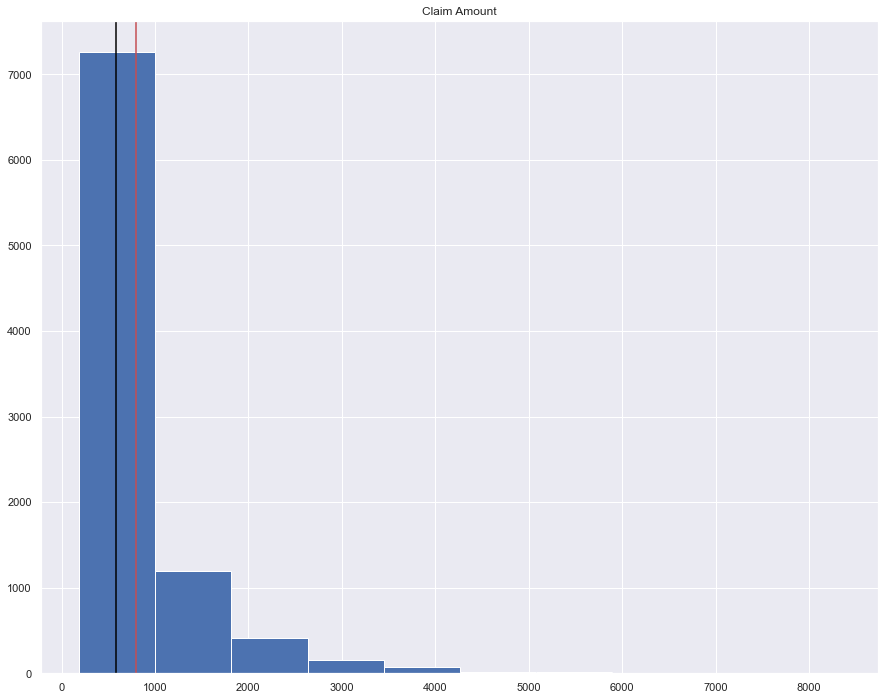

 Claim Amount Mean : 800.49
 Claim Amount Median : 578.02


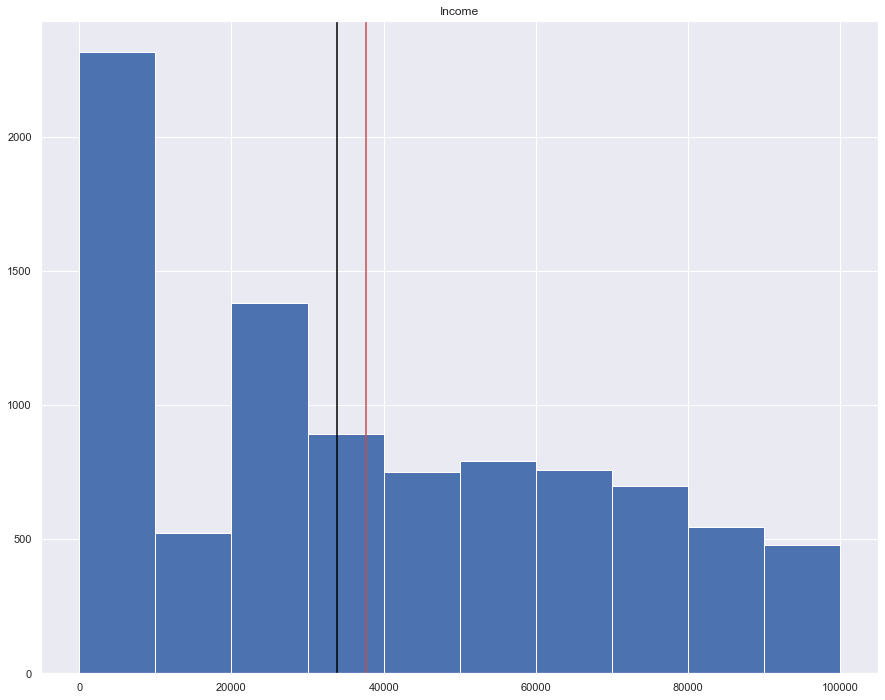

 Income Mean : 37657.38
 Income Median : 33889.50


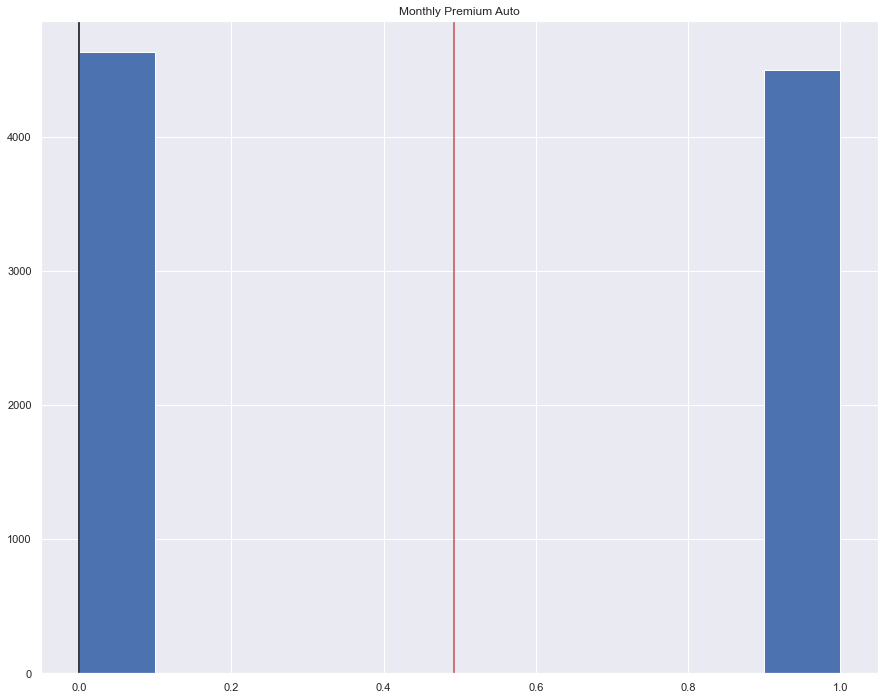

 Monthly Premium Auto Mean : 0.49
 Monthly Premium Auto Median : 0.00


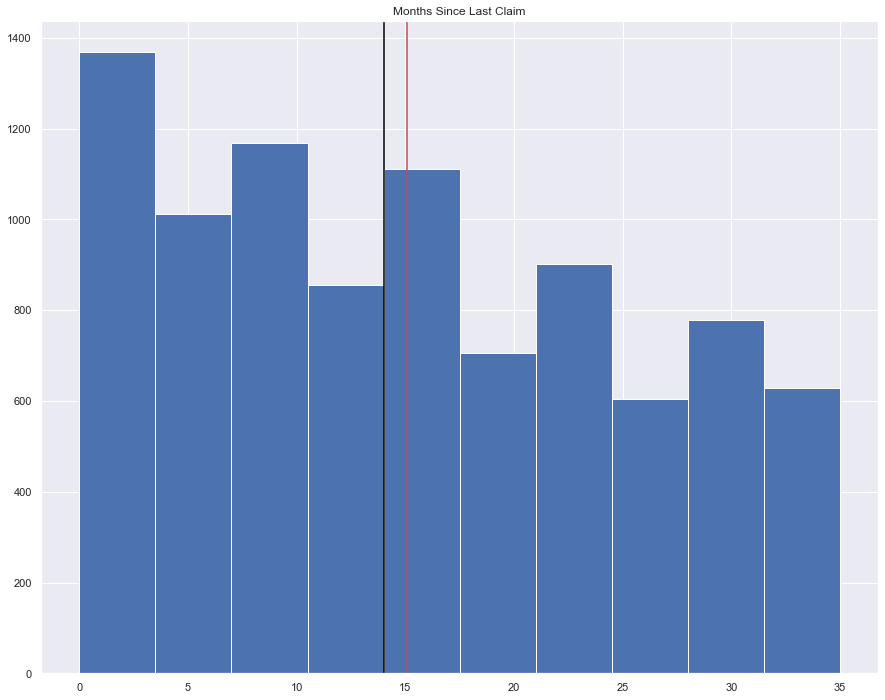

 Months Since Last Claim Mean : 15.10
 Months Since Last Claim Median : 14.00


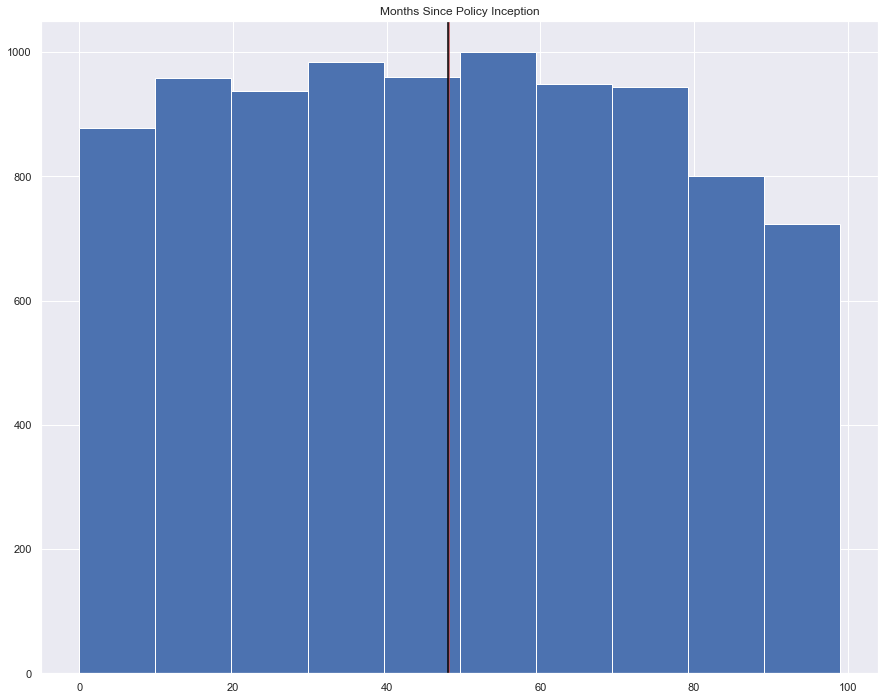

 Months Since Policy Inception Mean : 48.06
 Months Since Policy Inception Median : 48.00


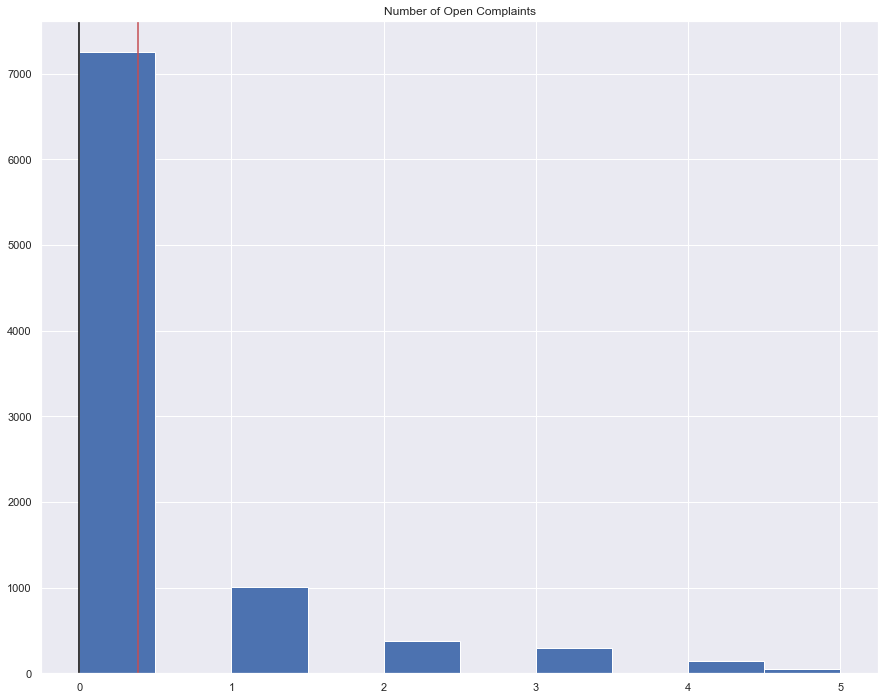

 Number of Open Complaints Mean : 0.38
 Number of Open Complaints Median : 0.00


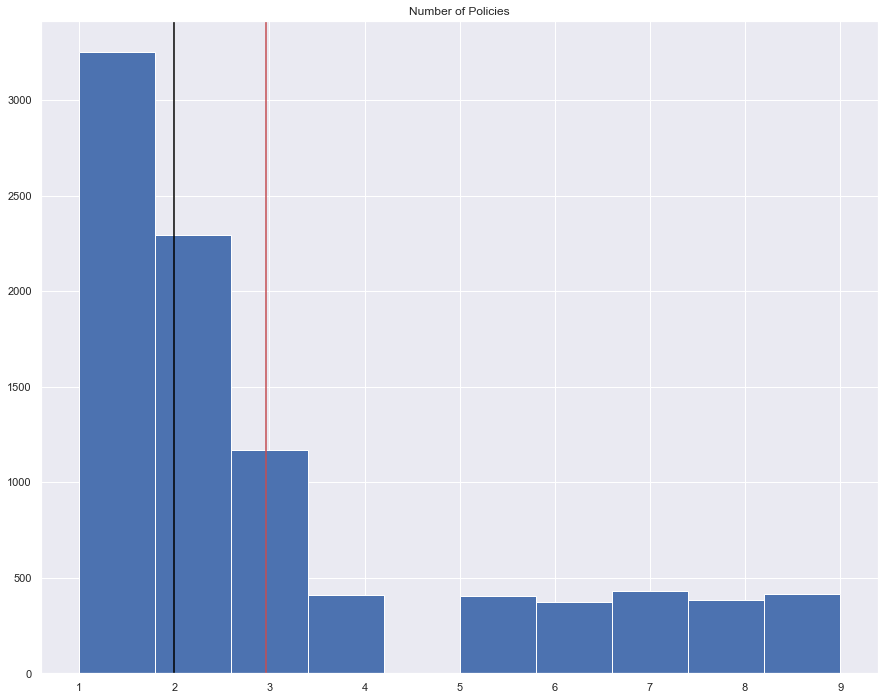

 Number of Policies Mean : 2.97
 Number of Policies Median : 2.00


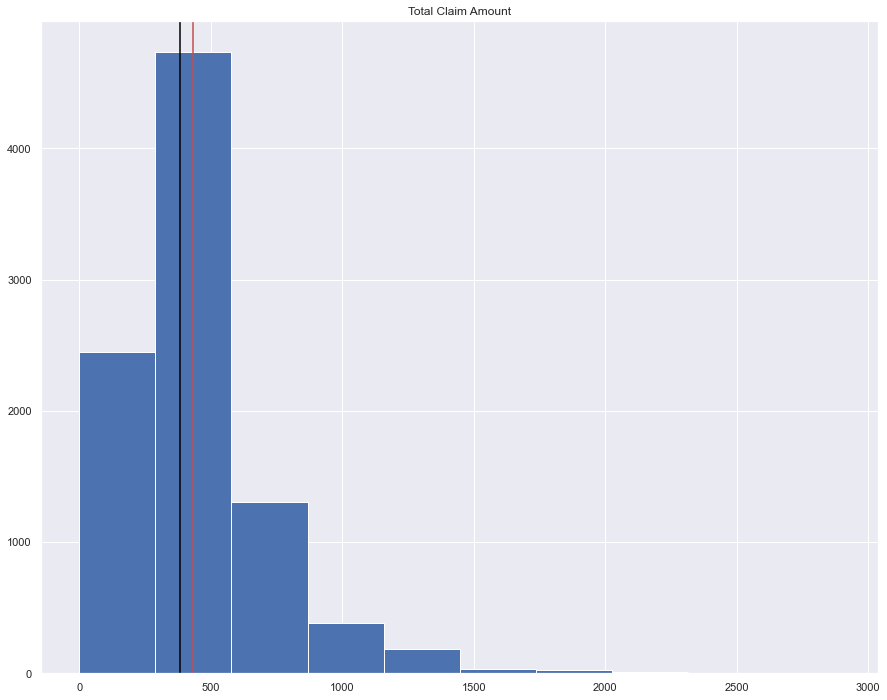

 Total Claim Amount Mean : 434.09
 Total Claim Amount Median : 383.95


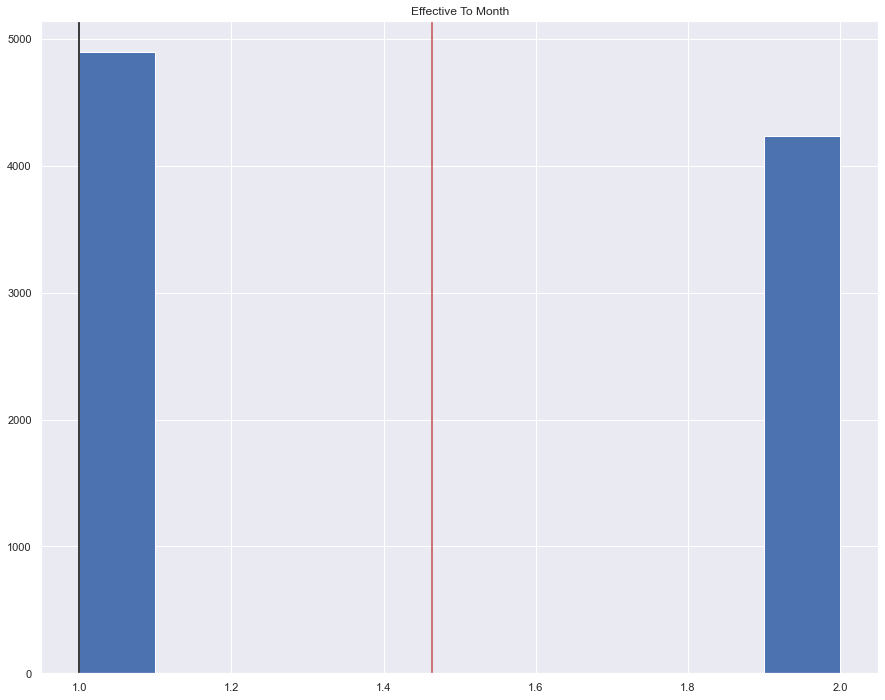

 Effective To Month Mean : 1.46
 Effective To Month Median : 1.00


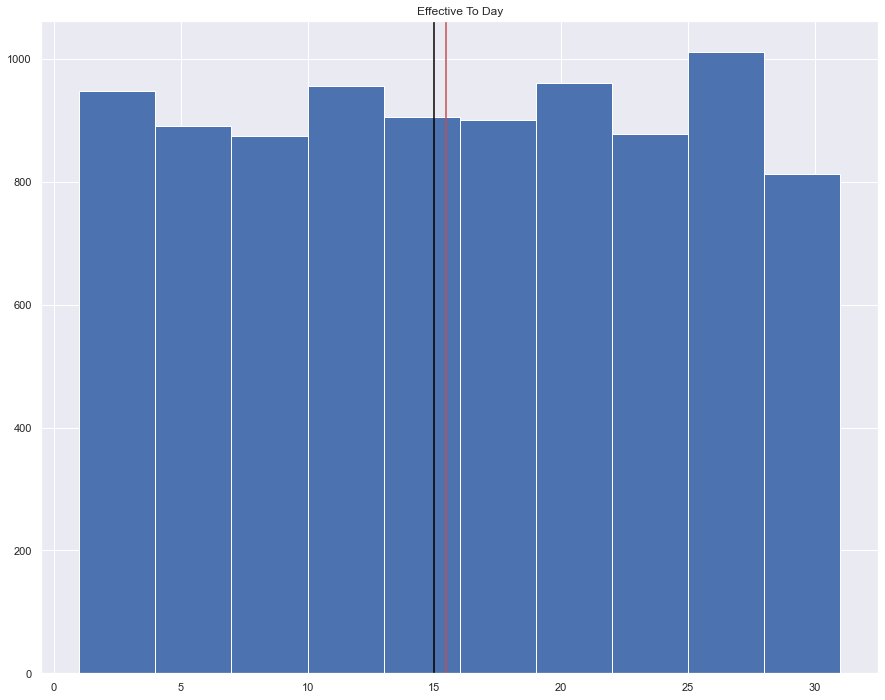

 Effective To Day Mean : 15.46
 Effective To Day Median : 15.00


In [30]:
# Once again, print out the numerical columns
for i in df.columns: 
    if ((df[i].dtype == int) | (df[i].dtype == float)):
        plt.figure()
        plt.hist(df[i])
        plt.title(i)
        plt.axvline(df[i].mean(), c= 'r')
        plt.axvline(df[i].median(), c = 'black')
        plt.show()
        print(f' {i} Mean : {df[i].mean():0.2f}')
        print(f' {i} Median : {df[i].median():0.2f}')

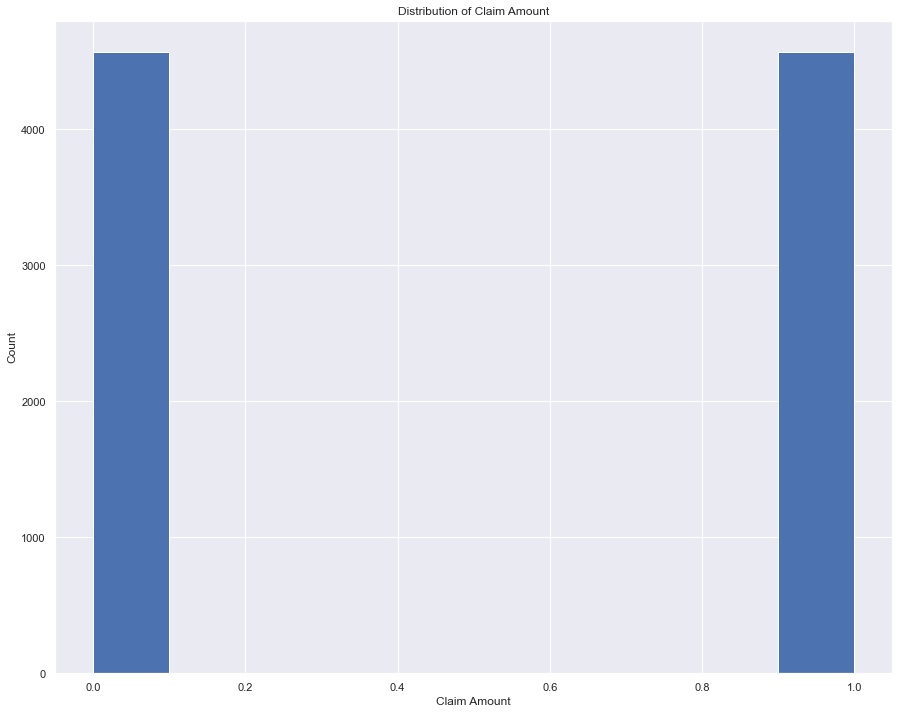

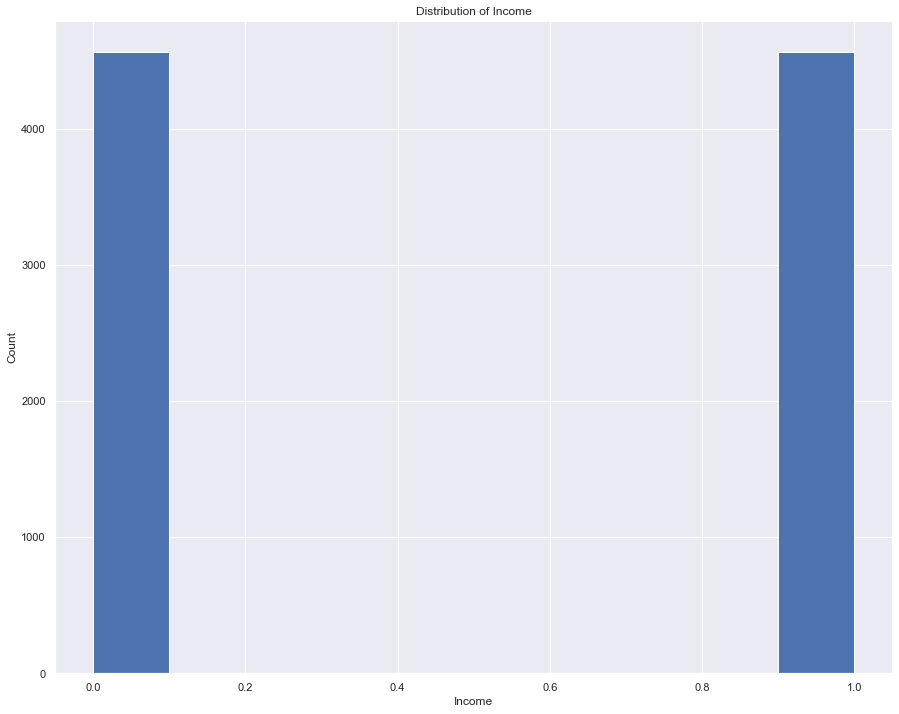

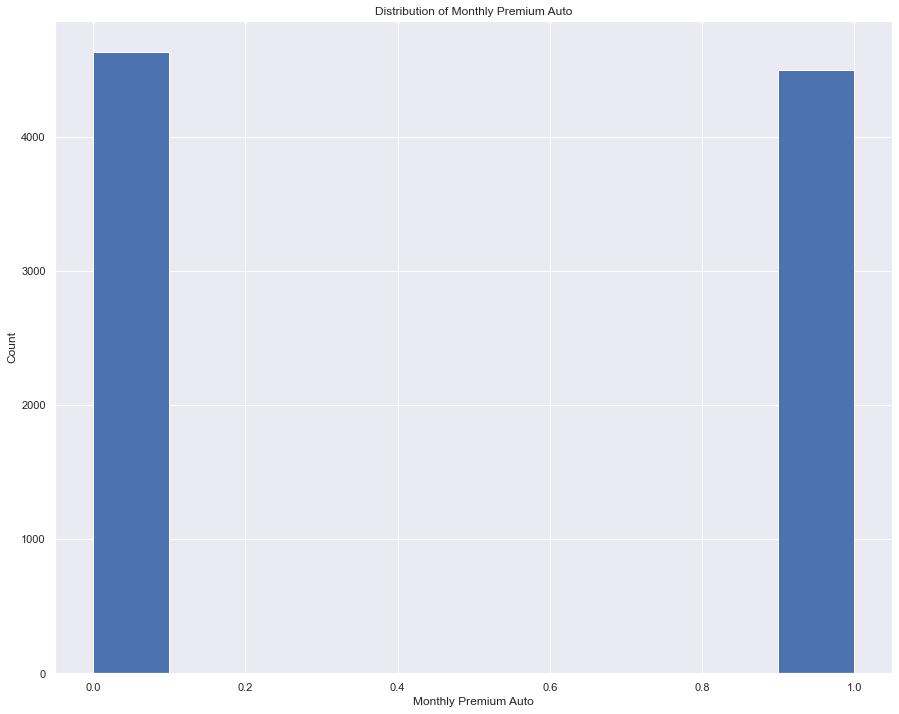

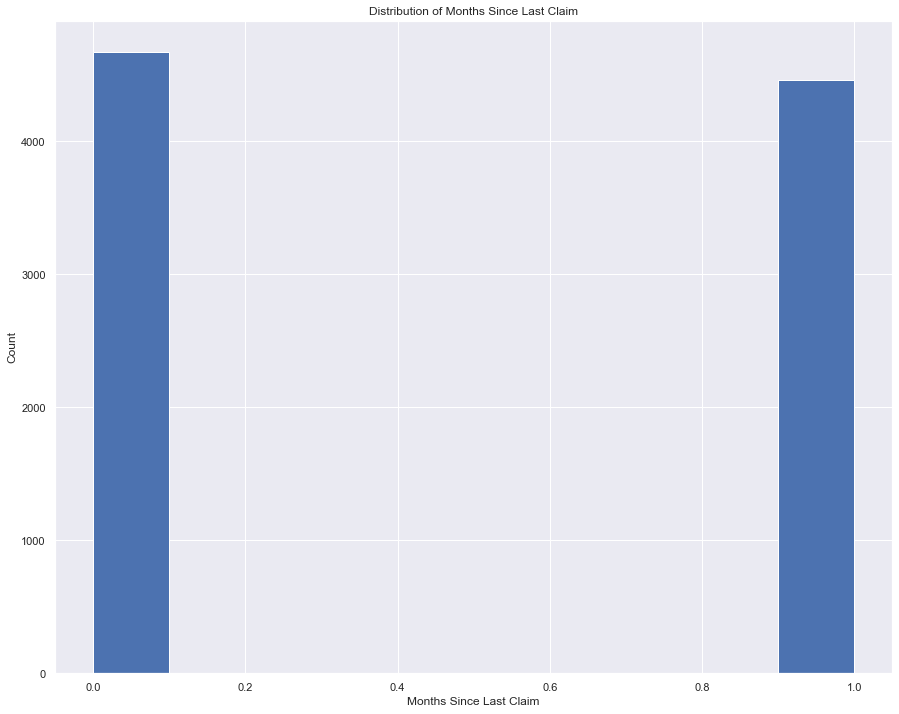

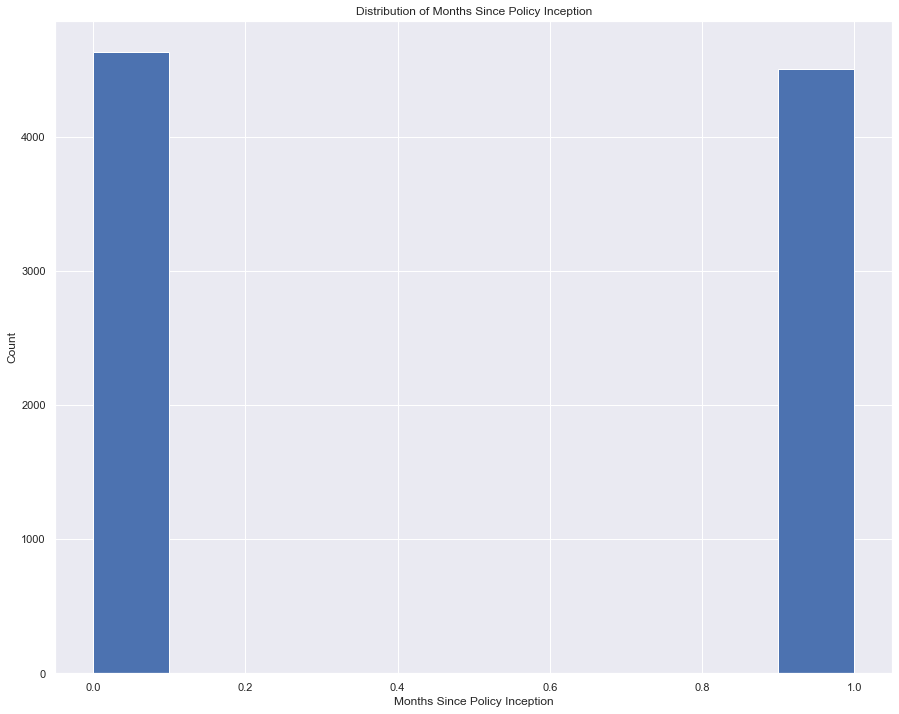

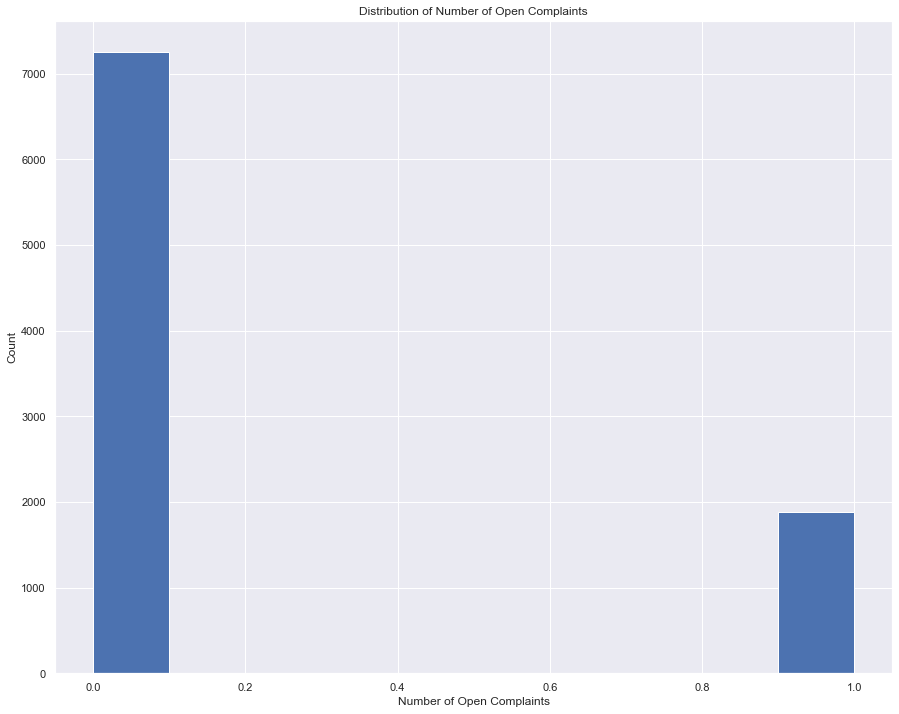

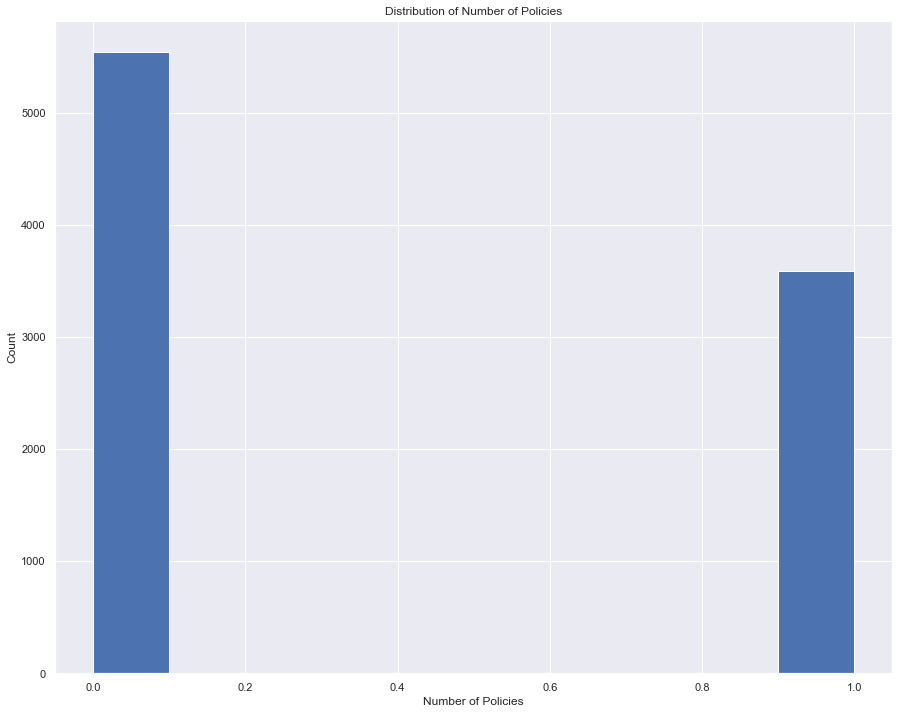

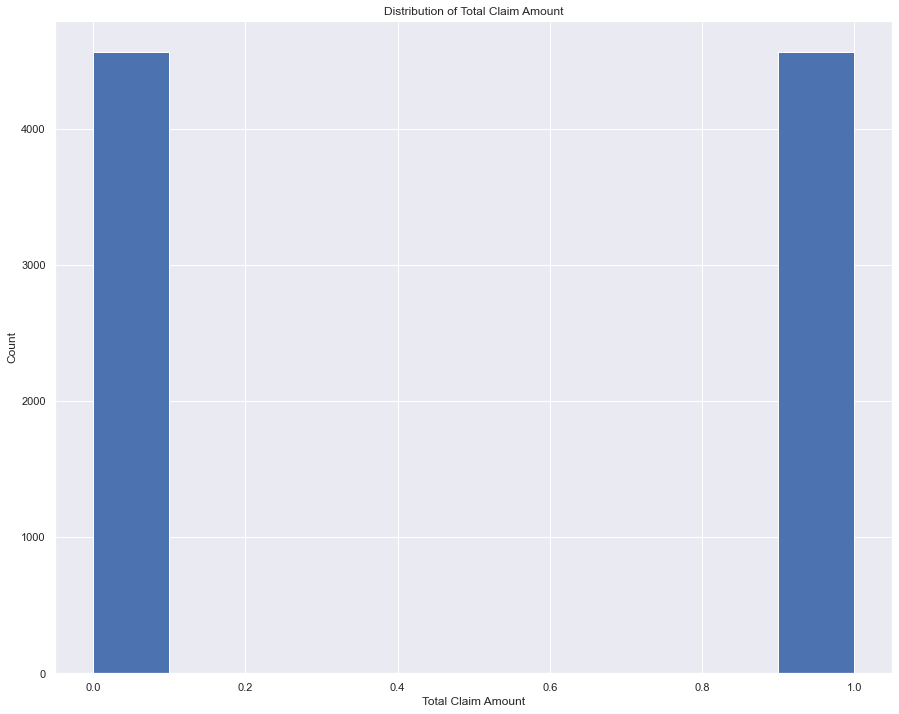

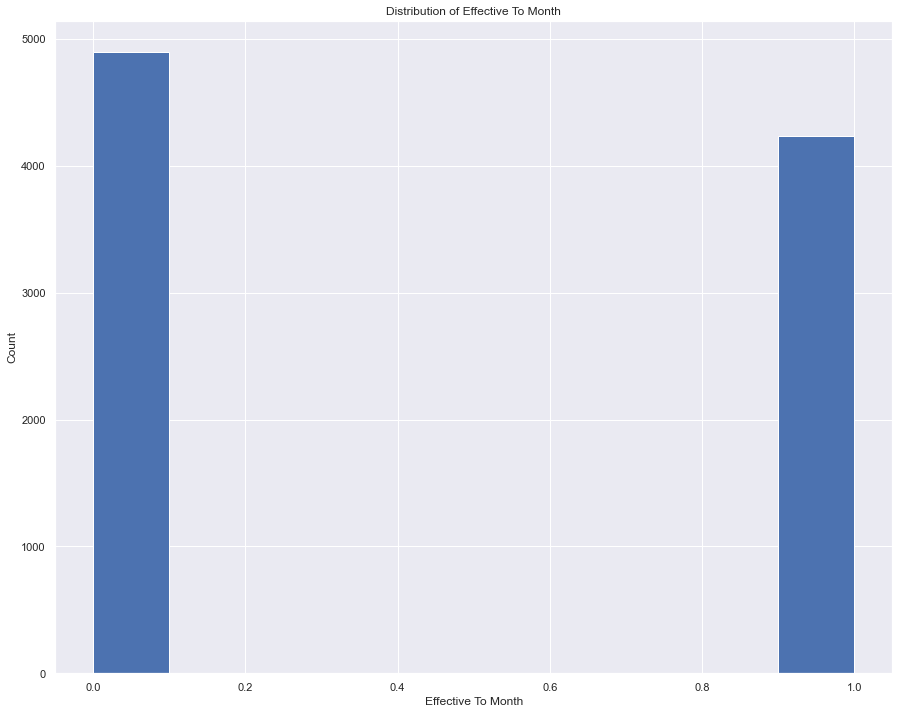

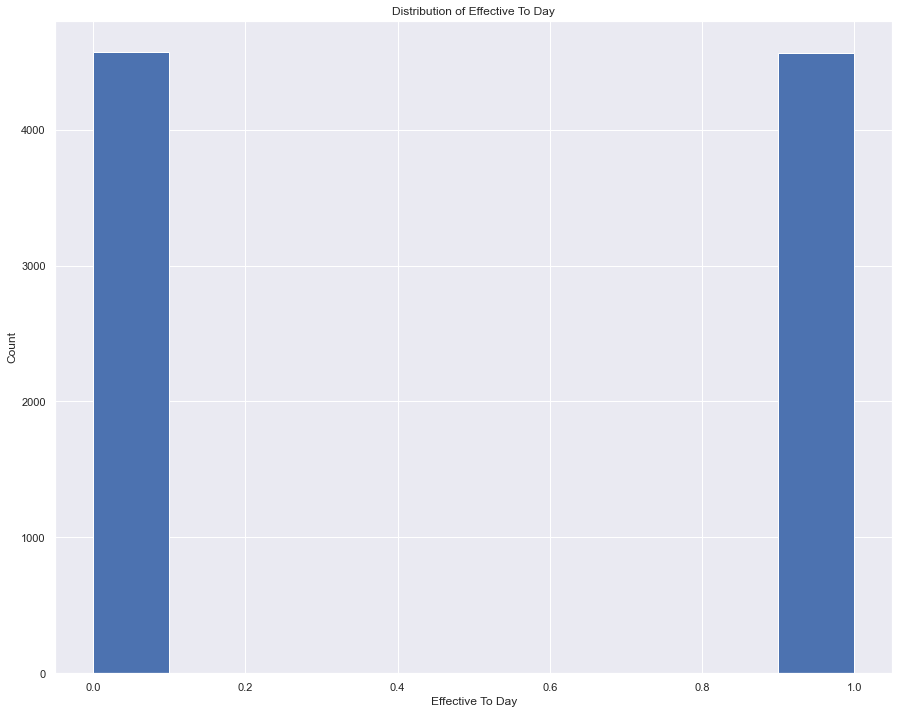

In [31]:
# Loop through the above columns and perform the operation that will get us a good distribution of data
for i in df.columns: 
    if ((df[i].dtype == int) | (df[i].dtype == float)):
        # Bin the column based on the median
        df[i] = np.where(df[i] > df[i].median() , 1, 0)
        plt.figure()
        plt.hist(df[i])
        plt.title('Distribution of ' + i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [32]:
# Once again let us look at the dataframe
df.head()

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day
0,Kansas,0,Basic,Bachelor,Employed,F,1,Suburban,Married,0,1,0,0,0,Corporate L3,Collision,Agent,1,Two-Door Car,Medsize,1,1
1,Nebraska,1,Extended,Bachelor,Unemployed,F,0,Suburban,Single,1,0,0,0,1,Personal L3,Scratch/Dent,Agent,1,Four-Door Car,Medsize,0,1
2,Oklahoma,1,Premium,Bachelor,Employed,F,1,Suburban,Married,1,1,0,0,0,Personal L3,Collision,Agent,1,Two-Door Car,Medsize,1,1
3,Missouri,1,Basic,Bachelor,Unemployed,M,0,Suburban,Married,1,1,1,0,1,Corporate L2,Collision,Call Center,1,SUV,Medsize,0,1
4,Kansas,0,Basic,Bachelor,Employed,M,1,Rural,Single,0,0,0,0,0,Personal L1,Collision,Agent,0,Four-Door Car,Medsize,1,0


In [33]:
'''
Since we are about to perform some operation on the non-numerical columns we 
will split the target and features at this step
'''

X = df.drop('Monthly Premium Auto', axis = 1)
y = df['Monthly Premium Auto']

In [34]:
# print the features dataframe
X

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day
0,Kansas,0,Basic,Bachelor,Employed,F,1,Suburban,Married,1,0,0,0,Corporate L3,Collision,Agent,1,Two-Door Car,Medsize,1,1
1,Nebraska,1,Extended,Bachelor,Unemployed,F,0,Suburban,Single,0,0,0,1,Personal L3,Scratch/Dent,Agent,1,Four-Door Car,Medsize,0,1
2,Oklahoma,1,Premium,Bachelor,Employed,F,1,Suburban,Married,1,0,0,0,Personal L3,Collision,Agent,1,Two-Door Car,Medsize,1,1
3,Missouri,1,Basic,Bachelor,Unemployed,M,0,Suburban,Married,1,1,0,1,Corporate L2,Collision,Call Center,1,SUV,Medsize,0,1
4,Kansas,0,Basic,Bachelor,Employed,M,1,Rural,Single,0,0,0,0,Personal L1,Collision,Agent,0,Four-Door Car,Medsize,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,1,Basic,Bachelor,Employed,M,1,Urban,Married,1,1,0,0,Personal L1,Hail,Web,0,Four-Door Car,Medsize,1,0
9130,Missouri,0,Extended,College,Employed,F,0,Suburban,Divorced,0,0,0,0,Corporate L3,Collision,Branch,0,Four-Door Car,Medsize,1,0
9131,Missouri,1,Extended,Bachelor,Unemployed,M,0,Suburban,Single,0,0,1,0,Corporate L2,Collision,Branch,1,Four-Door Car,Medsize,1,0
9132,Missouri,1,Extended,College,Employed,M,0,Suburban,Married,1,0,0,1,Personal L2,Scratch/Dent,Branch,1,Four-Door Car,Large,1,0


In [35]:
# print the target column
y

0       0
1       1
2       1
3       1
4       0
       ..
9129    0
9130    0
9131    1
9132    1
9133    0
Name: Monthly Premium Auto, Length: 9134, dtype: int64

### Feature Engineering

We are going to create a Train Remainder Validation Test Split.

We are doing this instead of a simple train test split because this sectioning of the data will allow us to perform hyperparameter optimization without leaking information into the test set. In addition, in order to perform OHE with leaking data, it is important to split the data into the different sections first.

In [36]:
# We are going to create a Train Remainder Validation Test Split. 
from sklearn.model_selection import train_test_split
X_remain, X_test, y_remain, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1, stratify = y)

In [37]:
X_train, X_validation, y_train, y_validation = train_test_split(X_remain,y_remain, test_size = 0.3, random_state = 1, stratify = y_remain)

In [38]:
# look at the X_train
X_train.head()

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day
276,Nebraska,1,Premium,College,Employed,M,0,Suburban,Divorced,1,0,0,1,Corporate L2,Collision,Branch,1,Four-Door Car,Medsize,0,0
3769,Iowa,1,Basic,College,Employed,F,0,Urban,Divorced,0,1,0,0,Personal L1,Collision,Branch,0,Four-Door Car,Small,0,1
8687,Missouri,1,Premium,High School or Below,Unemployed,F,0,Suburban,Married,1,1,1,0,Personal L1,Collision,Call Center,1,SUV,Medsize,1,0
8067,Missouri,0,Basic,Master,Employed,M,1,Rural,Divorced,0,1,0,1,Corporate L2,Hail,Branch,0,Four-Door Car,Small,0,1
2328,Missouri,0,Basic,Bachelor,Unemployed,M,0,Suburban,Married,0,1,1,0,Personal L1,Collision,Agent,1,SUV,Large,1,1


In [47]:
subcategory = X_train.loc[:,X_train.dtypes == object]

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to non numeric columns.
encoded = ohe.fit_transform(subcategory)
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [49]:
# Check the shape of the newly created dense array
for i in range(0,len(dense_array)):
    print(dense_array[i].shape)

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,

In [50]:
#perfect! it matches the original length of the X_train dataframe
len(dense_array)

5114

In [51]:
# These are the items within each non numeric column that will be turned into new columns
ohe.categories_

[array(['Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Collision', 'Hail', 'Other', 'Scratch/Dent'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-Door Car'], dtype=object),
 array(['Large', 'Medsize', 'Small'], dtype=object)]

In [52]:
# Let us breakup the above array into a single list
cats = []
for i in ohe.categories_:
    #print(i)
    for j in i:
        #print(j)
        cats.append(j)

In [54]:
# Look at the list to see if we did it correctly
cats

['Iowa',
 'Kansas',
 'Missouri',
 'Nebraska',
 'Oklahoma',
 'Basic',
 'Extended',
 'Premium',
 'Bachelor',
 'College',
 'Doctor',
 'High School or Below',
 'Master',
 'Disabled',
 'Employed',
 'Medical Leave',
 'Retired',
 'Unemployed',
 'F',
 'M',
 'Rural',
 'Suburban',
 'Urban',
 'Divorced',
 'Married',
 'Single',
 'Corporate L1',
 'Corporate L2',
 'Corporate L3',
 'Personal L1',
 'Personal L2',
 'Personal L3',
 'Special L1',
 'Special L2',
 'Special L3',
 'Collision',
 'Hail',
 'Other',
 'Scratch/Dent',
 'Agent',
 'Branch',
 'Call Center',
 'Web',
 'Four-Door Car',
 'Luxury Car',
 'Luxury SUV',
 'SUV',
 'Sports Car',
 'Two-Door Car',
 'Large',
 'Medsize',
 'Small']

In [53]:
# check the length to confirm
len(cats)

52

In [55]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=cats, dtype=int)
encoded_df.head()

,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


#### Check with the above-unmodified column to ensure that the new column headers are correctly aligned with the original data.

In [56]:
# Reset the index so the values start from 0
X_train.reset_index(drop = True, inplace = True)

In [57]:
# Add to the main dataframe
X_train_OHE = pd.concat([X_train,encoded_df], axis = 1)
X_train_OHE

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,Nebraska,1,Premium,College,Employed,M,0,Suburban,Divorced,1,0,0,1,Corporate L2,Collision,Branch,1,Four-Door Car,Medsize,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,Iowa,1,Basic,College,Employed,F,0,Urban,Divorced,0,1,0,0,Personal L1,Collision,Branch,0,Four-Door Car,Small,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,Missouri,1,Premium,High School or Below,Unemployed,F,0,Suburban,Married,1,1,1,0,Personal L1,Collision,Call Center,1,SUV,Medsize,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,Missouri,0,Basic,Master,Employed,M,1,Rural,Divorced,0,1,0,1,Corporate L2,Hail,Branch,0,Four-Door Car,Small,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,Missouri,0,Basic,Bachelor,Unemployed,M,0,Suburban,Married,0,1,1,0,Personal L1,Collision,Agent,1,SUV,Large,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,Oklahoma,1,Extended,College,Employed,M,1,Suburban,Divorced,0,1,0,1,Corporate L3,Collision,Agent,1,Four-Door Car,Medsize,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5110,Iowa,0,Basic,College,Employed,M,1,Rural,Married,0,1,0,0,Personal L1,Hail,Branch,0,Four-Door Car,Medsize,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5111,Oklahoma,1,Basic,Bachelor,Employed,F,0,Suburban,Divorced,1,1,0,0,Personal L2,Collision,Web,1,SUV,Medsize,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5112,Iowa,1,Basic,Bachelor,Employed,F,1,Urban,Married,1,0,1,0,Personal L3,Collision,Branch,1,SUV,Medsize,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [72]:
#Make a list of the non-numeric columns
tcolumns = []
for i in df.columns:
    if df[i].dtype == object:
        tcolumns.append(i)

In [73]:
tcolumns

['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [74]:
#Drop the non-numeric columns but keep the newly created OHE columns
X_train_OHE.drop(tcolumns, axis = 1 , inplace = True)

In [75]:
X_train_OHE

,Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Month,Effective To Day,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,1,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5110,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5111,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5112,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


Perform the same operation on the remaining dataset splits. 

X_validation, X_remain, X_test

In [76]:
subcategory_valid = pd.DataFrame(X_validation[tcolumns])
subcategory_valid.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
2884,Missouri,Basic,High School or Below,Employed,F,Rural,Married,Personal L3,Other,Agent,Two-Door Car,Large
671,Iowa,Basic,College,Employed,F,Urban,Married,Personal L3,Collision,Agent,SUV,Medsize
334,Nebraska,Basic,College,Employed,F,Suburban,Married,Personal L2,Collision,Call Center,Four-Door Car,Small
5230,Kansas,Basic,Bachelor,Unemployed,M,Suburban,Single,Personal L3,Scratch/Dent,Call Center,Four-Door Car,Medsize
1410,Iowa,Basic,College,Employed,F,Rural,Divorced,Personal L3,Other,Agent,SUV,Large


In [77]:
# Fit the OneHotEncoder to non numeric columns.
encoded_valid = ohe.fit_transform(subcategory_valid)
# Convert from sparse matrix to dense
dense_array_valid = encoded_valid.toarray()
# Put into a dataframe to get column names
encoded_df_valid = pd.DataFrame(dense_array_valid, columns=cats, dtype=int)
encoded_df_valid.head()

,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [78]:
X_validation.reset_index(drop = True, inplace = True)
# add to the main dataframe
X_validation_OHE = pd.concat([X_validation,encoded_df_valid], axis = 1)
X_validation_OHE

,State,Claim Amount,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective To Month,Effective To Day,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,Missouri,0,Basic,High School or Below,Employed,F,1,Rural,Married,1,0,0,1,Personal L3,Other,Agent,0,Two-Door Car,Large,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,Iowa,1,Basic,College,Employed,F,1,Urban,Married,1,0,0,1,Personal L3,Collision,Agent,0,SUV,Medsize,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,Nebraska,0,Basic,College,Employed,F,1,Suburban,Married,1,0,1,1,Personal L2,Collision,Call Center,0,Four-Door Car,Small,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,Kansas,1,Basic,Bachelor,Unemployed,M,0,Suburban,Single,0,0,0,0,Personal L3,Scratch/Dent,Call Center,1,Four-Door Car,Medsize,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,Iowa,0,Basic,College,Employed,F,1,Rural,Divorced,0,0,1,0,Personal L3,Other,Agent,0,SUV,Large,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,Missouri,1,Extended,Bachelor,Employed,F,1,Suburban,Married,1,0,0,1,Personal L2,Scratch/Dent,Branch,1,SUV,Medsize,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2189,Oklahoma,1,Extended,Bachelor,Employed,F,1,Suburban,Married,1,1,0,0,Personal L3,Collision,Call Center,1,Four-Door Car,Large,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2190,Missouri,0,Basic,Bachelor,Employed,F,1,Suburban,Married,0,1,0,0,Corporate L2,Other,Branch,1,Two-Door Car,Medsize,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2191,Kansas,1,Extended,High School or Below,Employed,M,1,Suburban,Married,1,1,0,1,Personal L2,Hail,Agent,1,Two-Door Car,Medsize,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [79]:
#Drop the non numerical columns.
X_validation_OHE.drop(tcolumns, axis = 1 , inplace = True)

In [80]:
subcategory_remain = pd.DataFrame(X_remain[tcolumns])
subcategory_remain.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
6869,Missouri,Basic,College,Unemployed,M,Suburban,Married,Personal L2,Collision,Branch,SUV,Small
8276,Oklahoma,Extended,High School or Below,Unemployed,M,Suburban,Single,Corporate L2,Collision,Agent,Two-Door Car,Medsize
7885,Oklahoma,Basic,College,Employed,M,Suburban,Single,Corporate L2,Hail,Call Center,Four-Door Car,Small
5770,Iowa,Basic,College,Employed,F,Suburban,Single,Corporate L3,Collision,Branch,Four-Door Car,Small
1567,Iowa,Basic,Doctor,Employed,F,Urban,Married,Personal L2,Hail,Call Center,Four-Door Car,Medsize


In [81]:
# Fit the OneHotEncoder to non numeric columns.
encoded_remain = ohe.fit_transform(subcategory_remain)
# Convert from sparse matrix to dense
dense_array_remain = encoded_remain.toarray()
# Put into a dataframe to get column names
encoded_df_remain = pd.DataFrame(dense_array_remain, columns=cats, dtype=int)
encoded_df_remain.head()

,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [82]:
X_remain.reset_index(drop = True, inplace = True)
# add to the main dataframe
X_remain_OHE = pd.concat([X_remain,encoded_df_remain], axis = 1)

#Drop the non numerical columns.
X_remain_OHE.drop(tcolumns, axis = 1 , inplace = True)
X_remain_OHE

,Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Month,Effective To Day,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
7303,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
7304,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
7305,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [83]:
subcategory_test = pd.DataFrame(X_test[tcolumns])
subcategory_test.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
812,Nebraska,Extended,Doctor,Employed,M,Rural,Single,Personal L2,Other,Call Center,Four-Door Car,Medsize
3824,Iowa,Extended,High School or Below,Unemployed,M,Suburban,Single,Corporate L3,Collision,Agent,Four-Door Car,Medsize
8635,Missouri,Basic,Bachelor,Employed,F,Suburban,Divorced,Personal L3,Hail,Call Center,Four-Door Car,Medsize
4219,Iowa,Basic,College,Employed,F,Suburban,Married,Personal L3,Hail,Web,Two-Door Car,Small
3150,Oklahoma,Basic,Bachelor,Employed,M,Suburban,Divorced,Personal L1,Collision,Branch,Sports Car,Small


In [84]:
# Fit the OneHotEncoder to non numeric columns.
encoded_test = ohe.fit_transform(subcategory_test)
# Convert from sparse matrix to dense
dense_array_test = encoded_test.toarray()
# Put into a dataframe to get column names
encoded_df_test = pd.DataFrame(dense_array_test, columns=cats, dtype=int)
encoded_df_test.head()

,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [85]:
X_test.reset_index(drop = True, inplace = True)
# add to the main dataframe
X_test_OHE = pd.concat([X_test,encoded_df_test], axis = 1)

#Drop the non numerical columns.
X_test_OHE.drop(tcolumns, axis = 1 , inplace = True)
X_test_OHE

,Claim Amount,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Month,Effective To Day,Iowa,Kansas,Missouri,Nebraska,Oklahoma,Basic,Extended,Premium,Bachelor,College,Doctor,High School or Below,Master,Disabled,Employed,Medical Leave,Retired,Unemployed,F,M,Rural,Suburban,Urban,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Collision,Hail,Other,Scratch/Dent,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1823,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1824,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1825,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


## Initial Modelling 
Since the OHE is finished. The preliminary modelling can begin. I will be doing the modelling one at a time. Before tuning using grid search.
The models that are going to be used are

1. Logistic Regression
2. KNN
3. Decision Tree
4. SVM

In [248]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# Instatiate the model
insurance_logit = LogisticRegression(random_state = 42)
# Fit the model
insurance_logit.fit(X_train_OHE,y_train)
# Score
print(f'Score on Train: {insurance_logit.score(X_train_OHE, y_train)}')
print(f'Score on Validation: {insurance_logit.score(X_validation_OHE, y_validation)}')

Score on Train: 0.9442706296441142
Score on Validation: 0.9357045143638851


In [247]:
#2. KNN
from sklearn.neighbors import KNeighborsClassifier
insurance_knn = KNeighborsClassifier()
insurance_knn.fit(X_train_OHE, y_train)
print(f' Train Score: {insurance_knn.score(X_train_OHE,y_train)}')
print(f' Validation Score: {insurance_knn.score(X_validation_OHE,y_validation)}')

 Train Score: 0.9223699648025029
 Validation Score: 0.8732330141358869


In [246]:
#3. Decision Tree
from sklearn.tree import DecisionTreeClassifier
insurance_tree = DecisionTreeClassifier()
insurance_tree.fit(X_train_OHE, y_train)
print(f' Train Score: {insurance_tree.score(X_train_OHE,y_train)}')
print(f' Validation Score: {insurance_tree.score(X_validation_OHE,y_validation)}')

 Train Score: 1.0
 Validation Score: 0.925672594619243


In [245]:
# 4. SVM
from sklearn.svm import LinearSVC
insurance_svm = LinearSVC()
insurance_svm.fit(X_train_OHE, y_train)
print(f' Train Score: {insurance_svm.score(X_train_OHE,y_train)}')
print(f' Validation Score: {insurance_svm.score(X_validation_OHE,y_validation)}')

 Train Score: 0.946030504497458
 Validation Score: 0.9320565435476517


#### Overall the scores are very good. Based on the initial modelling the best model appears to be the logistic regression model.

In [90]:
# Using the logistic regression model let us print the confusion matrix
from sklearn.metrics import confusion_matrix
# Predict the y values
y_pred = insurance_logit.predict(X_validation_OHE)
# print the confusion matrix
confusion_matrix(y_validation, y_pred)

array([[ 983,  129],
       [  12, 1069]])

|    |  Predicted Low Premium  |   Predicted High Premium  | 
| --------- |:---:|:---:|
|True Low Premium |983 | 129 | 
|True High Premium |12 |1069 | 

In [91]:
from sklearn.metrics import classification_report
# print the classification report
report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1112
           1       0.89      0.99      0.94      1081

    accuracy                           0.94      2193
   macro avg       0.94      0.94      0.94      2193
weighted avg       0.94      0.94      0.94      2193



#### We can get an accuracy score of 94% without any hyperparameter optimization, which is very good. We were also able to get a perfect recall and precision score. Is hyperparameter optimization even required? Yes, let us try to get a recall score of 100%

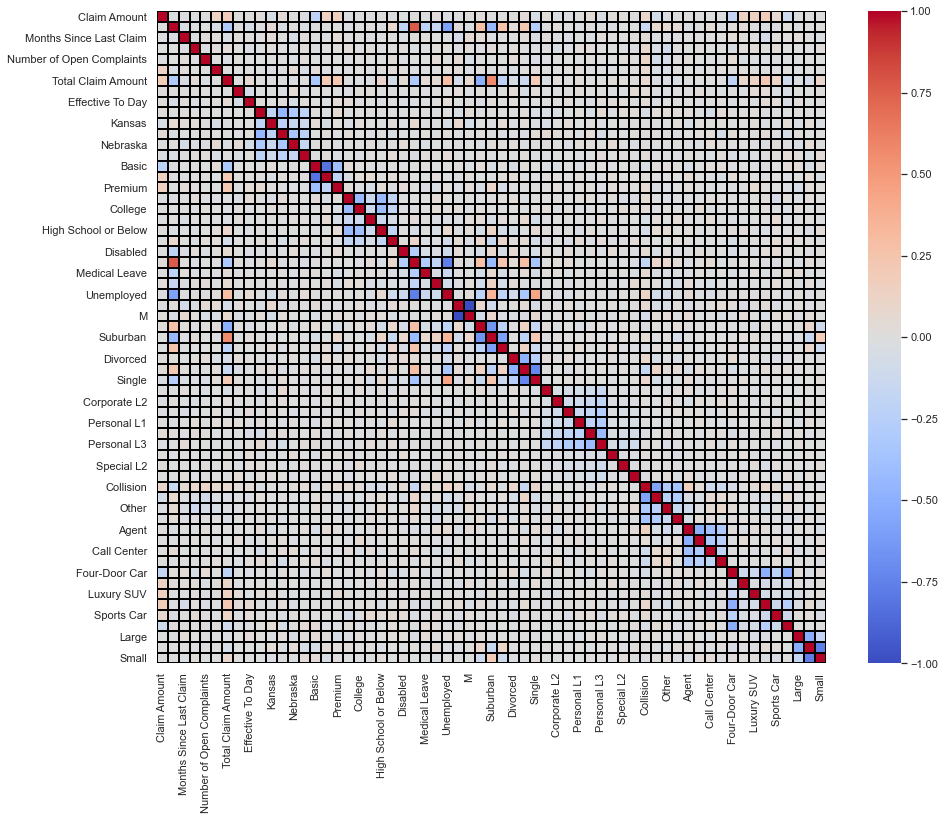

In [92]:
# let us check the correlation between the newly created OHE dataframe
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(X_validation_OHE.corr(),vmin= -1, vmax = 1, center = 0, cmap = 'coolwarm', linewidths = 1, linecolor = 'black');

#### There are some minor correlations in this data frame. Let us see if the feature selection process will eliminate this multi-collinearity.

## Feature Selection

In [ ]:
y_train.reset_index(drop = True, inplace = True)

In [94]:
'''
The first selection method studied will be from the logistic regression model
'''
# First, create a table of the feature names and their regression coefficients
coef_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
coef_table.insert(len(coef_table.columns),"Coefs",insurance_logit.coef_.transpose()) # insert the logreg coefficients
coef_table

,0,Coefs
0,Claim Amount,0.309043
1,Income,0.007736
2,Months Since Last Claim,-0.050986
3,Months Since Policy Inception,-0.115116
4,Number of Open Complaints,-0.293550
...,...,...
56,Sports Car,2.938031
57,Two-Door Car,-5.422707
58,Large,-0.289134
59,Medsize,0.007946


In [95]:
# find the odds_ratio
coef_table['odds_ratio'] = np.exp(coef_table['Coefs'])

In [96]:
# sort the results by odds_ratio from largest to smallest
coef_table.sort_values(by = 'odds_ratio', ascending = False).head(10)

,0,Coefs,odds_ratio
16,Premium,4.083362,59.344645
55,SUV,4.001090,54.657680
6,Total Claim Amount,3.494534,32.934953
56,Sports Car,2.938031,18.878635
54,Luxury SUV,2.046176,7.738251
53,Luxury Car,1.939537,6.955533
29,Rural,1.388965,4.010696
31,Urban,0.751715,2.120633
15,Extended,0.623002,1.864516
19,Doctor,0.605115,1.831462


In [97]:
# sort the results by odds_ratio from largest to smallest
coef_table.sort_values(by = 'odds_ratio', ascending = True).head(10)

,0,Coefs,odds_ratio
52,Four-Door Car,-5.502778,0.004075
57,Two-Door Car,-5.422707,0.004415
14,Basic,-4.707014,0.009032
30,Suburban,-2.141330,0.117498
41,Special L1,-0.876240,0.416345
42,Special L2,-0.757111,0.469019
5,Number of Policies,-0.356238,0.700306
4,Number of Open Complaints,-0.293550,0.745612
58,Large,-0.289134,0.748912
21,Master,-0.246563,0.781482


In [98]:
'''
The second selection method will be based on the KBest scoring
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [119]:
# Instatiate
selector = SelectKBest(score_func = f_classif, k = 'all')
# Fit
fit = selector.fit(X_train_OHE,y_train)
# 3 decimal places
set_printoptions(precision = 3)
print(fit.scores_)
#transform into the shape we want
features = fit.transform(X_train_OHE)

print(features[0:,:])

[7.926e+02 2.624e+00 1.249e-01 1.244e-01 3.174e+00 6.364e-01 1.588e+03
 7.582e-02 1.829e+00 1.058e+00 7.890e-02 8.534e-01 1.373e+00 3.618e+00
 1.885e+03 7.137e+02 5.945e+02 3.436e+00 8.703e-02 3.818e-01 5.556e+00
 9.903e-03 9.219e-04 3.190e+00 2.576e-01 2.664e+00 2.456e+00 1.767e-02
 1.767e-02 2.002e+00 1.119e+01 7.746e+00 2.544e-01 3.895e-01 8.303e-02
 1.109e-07 2.501e-01 7.841e-01 4.968e-01 3.894e-03 6.447e-01 5.088e-02
 3.292e-01 3.352e-02 5.157e+01 2.316e+01 1.456e+01 4.114e-02 1.731e-01
 2.797e+00 9.877e-01 2.515e+00 1.023e+03 1.027e+02 1.195e+02 1.686e+03
 3.112e+02 2.460e+02 1.384e+00 1.830e-04 8.809e-01]
[[1 0 1 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [1 0 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 [0 1 0 ... 0 1 0]]


In [120]:
# First, create a table of the feature names and their regression coefficients
kbest_table = pd.DataFrame(list(X_train_OHE.columns)) # Copy out the feature names from the data
# transpose is required for the shapes to match when inserting the data.
kbest_table.insert(len(kbest_table.columns),"KBest",fit.scores_.transpose()) # insert the logreg coefficients
kbest_table

,0,KBest
0,Claim Amount,792.597000
1,Income,2.624221
2,Months Since Last Claim,0.124918
3,Months Since Policy Inception,0.124355
4,Number of Open Complaints,3.173610
...,...,...
56,Sports Car,311.158264
57,Two-Door Car,246.008750
58,Large,1.384114
59,Medsize,0.000183


In [121]:
kbest_table.sort_values(by = 'KBest', ascending = False).head(15)

,0,KBest
14,Basic,1885.049090
55,SUV,1686.204736
6,Total Claim Amount,1588.347364
52,Four-Door Car,1022.716147
0,Claim Amount,792.597000
15,Extended,713.697933
16,Premium,594.489365
56,Sports Car,311.158264
57,Two-Door Car,246.008750
54,Luxury SUV,119.477540


In [122]:
kbest_table.sort_values(by = 'KBest', ascending = True).head(10)

,0,KBest
35,Corporate L1,1.108655e-07
59,Medsize,1.829694e-04
22,Disabled,9.219410e-04
39,Personal L2,3.893894e-03
21,Master,9.903199e-03
28,M,1.766996e-02
27,F,1.766996e-02
43,Special L3,3.351573e-02
47,Scratch/Dent,4.114176e-02
41,Special L1,5.088433e-02


In [128]:
from sklearn.feature_selection import chi2

selectorchi = SelectKBest(score_func = chi2, k = 16)
fitchi = selectorchi.fit(X_train_OHE,y_train)

set_printoptions(precision = 3)
print(fitchi.scores_)
featureschi = fitchi.transform(X_train_OHE)

print(featureschi[0:,:])

[3.376e+02 1.309e+00 6.356e-02 6.154e-02 2.515e+00 3.860e-01 6.092e+02
 4.015e-02 9.308e-01 7.495e-01 7.213e-02 5.611e-01 1.121e+00 3.268e+00
 5.305e+02 4.429e+02 4.838e+02 2.402e+00 6.185e-02 3.679e-01 3.924e+00
 9.113e-03 8.792e-04 1.201e+00 2.458e-01 2.580e+00 1.836e+00 8.659e-03
 9.018e-03 1.618e+00 4.072e+00 6.400e+00 2.163e-01 1.631e-01 6.076e-02
 1.064e-07 2.338e-01 7.028e-01 4.268e-01 2.994e-03 4.025e-01 5.051e-02
 3.239e-01 3.295e-02 3.015e+01 1.567e+01 1.290e+01 3.465e-02 1.065e-01
 2.019e+00 7.997e-01 2.145e+00 4.253e+02 9.882e+01 1.143e+02 1.022e+03
 2.779e+02 1.852e+02 1.240e+00 5.333e-05 7.164e-01]
[[1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


In [129]:
# First, create a table of the feature names and their regression coefficients
kbest_tablechi = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
kbest_tablechi.insert(len(kbest_tablechi.columns),"KBest",fitchi.scores_.transpose()) # insert the logreg coefficients
kbest_tablechi

,0,KBest
0,Claim Amount,337.598223
1,Income,1.308872
2,Months Since Last Claim,0.063557
3,Months Since Policy Inception,0.061543
4,Number of Open Complaints,2.514605
...,...,...
56,Sports Car,277.928571
57,Two-Door Car,185.172017
58,Large,1.239735
59,Medsize,0.000053


In [130]:
kbest_tablechi.sort_values(by = 'KBest', ascending = False).head(15)

,0,KBest
55,SUV,1022.159524
6,Total Claim Amount,609.230015
14,Basic,530.461000
16,Premium,483.801587
15,Extended,442.868487
52,Four-Door Car,425.276219
0,Claim Amount,337.598223
56,Sports Car,277.928571
57,Two-Door Car,185.172017
54,Luxury SUV,114.259524


In [125]:
from sklearn.feature_selection import mutual_info_classif

selectormic = SelectKBest(score_func = mutual_info_classif, k = 16)
fitmic = selectormic.fit(X_train_OHE,y_train)

set_printoptions(precision = 3)
print(fitmic.scores_)
featuresmic = fitmic.transform(X_train_OHE)

print(featuresmic[0:,:])

[6.633e-02 9.373e-03 5.513e-03 8.574e-03 0.000e+00 0.000e+00 1.269e-01
 0.000e+00 9.511e-03 7.850e-03 9.861e-03 7.806e-03 2.572e-03 2.092e-03
 1.375e-01 5.584e-02 6.024e-02 0.000e+00 0.000e+00 1.854e-05 2.162e-03
 3.332e-03 2.083e-03 2.510e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 4.478e-03 0.000e+00 8.806e-04 0.000e+00
 0.000e+00 1.527e-03 0.000e+00 0.000e+00 9.031e-03 0.000e+00 2.872e-03
 1.008e-03 2.820e-03 7.594e-03 0.000e+00 0.000e+00 1.007e-02 1.211e-03
 0.000e+00 8.440e-03 0.000e+00 9.509e-02 7.505e-03 1.877e-02 1.726e-01
 3.623e-02 2.542e-02 1.603e-03 1.509e-03 2.086e-04]
[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 0 0]]


In [126]:
# First, create a table of the feature names and their regression coefficients
kbest_tablemic = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
kbest_tablemic.insert(len(kbest_tablemic.columns),"KBest",fitmic.scores_.transpose()) # insert the logreg coefficients
kbest_tablemic

,0,KBest
0,Claim Amount,0.066332
1,Income,0.009373
2,Months Since Last Claim,0.005513
3,Months Since Policy Inception,0.008574
4,Number of Open Complaints,0.000000
...,...,...
56,Sports Car,0.036234
57,Two-Door Car,0.025422
58,Large,0.001603
59,Medsize,0.001509


In [127]:
kbest_tablemic.sort_values(by = 'KBest', ascending = False).head(15)

,0,KBest
55,SUV,0.172554
14,Basic,0.137539
6,Total Claim Amount,0.126939
52,Four-Door Car,0.095086
0,Claim Amount,0.066332
16,Premium,0.060239
15,Extended,0.055839
56,Sports Car,0.036234
57,Two-Door Car,0.025422
54,Luxury SUV,0.018768


In [131]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [134]:
rfe = RFE(estimator =insurance_logit,n_features_to_select = 1, step = 1 )
rfe.fit(X_train_OHE,y_train)
ranking = rfe.ranking_

In [135]:
ranking

array([17, 58, 51, 40, 21, 18,  5, 35, 31, 44, 45, 37, 46, 29,  3, 16,  4,
       33, 60, 15, 34, 32, 56, 28, 36, 41, 55, 43, 50, 13,  6, 14, 48, 47,
       30, 22, 24, 23, 26, 52, 25, 12, 11, 38, 20, 39, 59, 49, 42, 61, 54,
       53,  2, 10,  9,  7,  8,  1, 19, 57, 27])

In [136]:
# First, create a table of the feature names and their regression coefficients
rfe_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
rfe_table.insert(len(rfe_table.columns),"RFE",rfe.ranking_.transpose()) # insert the logreg coefficients
#rfe_table

In [137]:
rfe_table.sort_values(by = 'RFE', ascending = True).head(15)

,0,RFE
57,Two-Door Car,1
52,Four-Door Car,2
14,Basic,3
16,Premium,4
6,Total Claim Amount,5
30,Suburban,6
55,SUV,7
56,Sports Car,8
54,Luxury SUV,9
53,Luxury Car,10


In [140]:
rfe_tree = RFE(estimator =insurance_tree,n_features_to_select = 1, step = 1 )
rfe_tree.fit(X_train_OHE,y_train)
ranking_tree = rfe_tree.ranking_
# First, create a table of the feature names and their regression coefficients
rfetree_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
rfetree_table.insert(len(rfetree_table.columns),"RFE",rfe_tree.ranking_.transpose()) # insert the logreg coefficients
rfetree_table.sort_values(by = 'RFE', ascending = True).head(15)

,0,RFE
55,SUV,1
14,Basic,2
56,Sports Car,3
54,Luxury SUV,4
53,Luxury Car,5
15,Extended,6
30,Suburban,7
6,Total Claim Amount,8
59,Medsize,9
2,Months Since Last Claim,10


In [138]:
rfe_svc = RFE(estimator =insurance_svm,n_features_to_select = 1, step = 1 )
rfe_svc.fit(X_train_OHE,y_train)
ranking_svc = rfe_svc.ranking_
# First, create a table of the feature names and their regression coefficients
rfesvc_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
rfesvc_table.insert(len(rfesvc_table.columns),"RFE",rfe_svc.ranking_.transpose()) # insert the logreg coefficients
rfesvc_table.sort_values(by = 'RFE', ascending = True).head(15)

,0,RFE
57,Two-Door Car,1
52,Four-Door Car,2
14,Basic,3
6,Total Claim Amount,4
29,Rural,5
31,Urban,6
16,Premium,7
42,Special L2,8
41,Special L1,9
55,SUV,10


In [141]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
print(X_train_OHE.shape)
clf = ExtraTreesClassifier(n_estimators = 50)
clf = clf.fit(X_train_OHE,y_train)
print(clf.feature_importances_.shape)
model = SelectFromModel(clf, prefit = True)
X_new = model.transform(X_train_OHE)
print(X_new.shape)

(5114, 61)
(61,)
(5114, 10)


In [143]:
# First, create a table of the feature names and their regression coefficients
clf_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
clf_table.insert(len(clf_table.columns),"CLF",clf.feature_importances_.transpose()) # insert the logreg coefficients
clf_table.sort_values(by = 'CLF', ascending = False).head(15)

,0,CLF
14,Basic,0.168220
55,SUV,0.130364
52,Four-Door Car,0.105649
6,Total Claim Amount,0.084859
57,Two-Door Car,0.061151
15,Extended,0.058224
16,Premium,0.048015
0,Claim Amount,0.046004
56,Sports Car,0.030703
5,Number of Policies,0.017844


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
BRE = LogisticRegression().fit(X_train_OHE, y_train)
result = permutation_importance(BRE, X_train_OHE, y_train, n_repeats=10, random_state=0)
print(result.importances_mean)
print(result.importances_std)

[ 1.955e-04 -2.738e-04 -2.738e-04 -9.582e-04  4.693e-04  1.036e-03
  4.005e-02  3.715e-04 -5.084e-04 -5.084e-04  4.441e-17 -7.431e-04
 -3.715e-04 -5.866e-05  1.334e-01  3.363e-03  1.621e-02 -2.933e-04
  0.000e+00  1.173e-04 -2.738e-04  1.955e-05  0.000e+00  1.955e-05
  1.955e-05  1.173e-04 -9.777e-05 -3.129e-04 -3.129e-04  1.523e-02
  1.766e-02  1.662e-03 -1.564e-04  1.369e-04  2.151e-04  2.346e-04
  2.542e-04 -3.911e-05  5.475e-04 -5.866e-05  6.844e-04  6.257e-04
  1.369e-04 -3.911e-04  7.039e-04 -4.889e-04  0.000e+00  3.911e-05
 -1.760e-04  0.000e+00 -7.822e-05 -2.151e-04  1.777e-01  2.220e-17
  9.777e-05  1.216e-02  1.212e-03  1.119e-01  8.799e-04 -1.955e-04
  3.911e-04]
[4.194e-04 1.297e-04 2.346e-04 5.423e-04 7.379e-04 9.339e-04 2.706e-03
 3.547e-04 7.061e-04 3.731e-04 2.623e-04 3.476e-04 3.207e-04 2.151e-04
 2.400e-03 1.248e-03 9.911e-04 8.535e-04 0.000e+00 1.994e-04 6.134e-04
 3.653e-04 0.000e+00 3.857e-04 1.624e-04 1.564e-04 2.004e-04 1.564e-04
 1.564e-04 9.023e-04 1.361e-03 9.

In [146]:
# First, create a table of the feature names and their regression coefficients
bre_table = pd.DataFrame(list(X_train_OHE.columns)).copy() # Copy out the feature names from the data
bre_table.insert(len(bre_table.columns),"importance",result.importances_mean.transpose())
bre_table.insert(len(bre_table.columns),"std",result.importances_std.transpose())# insert the logreg coefficients
bre_table.sort_values(by = 'importance', ascending = False).head(15)

,0,importance,std
52,Four-Door Car,0.177689,0.006249
14,Basic,0.133438,0.002400
57,Two-Door Car,0.111948,0.002317
6,Total Claim Amount,0.040047,0.002706
30,Suburban,0.017657,0.001361
16,Premium,0.016210,0.000991
29,Rural,0.015233,0.000902
55,SUV,0.012163,0.001401
15,Extended,0.003363,0.001248
31,Urban,0.001662,0.000927


# Feature Selection Result

Above, we can see several ways of determining feature importance. The first method, which involved using the coef of the logistic regression model, would not be a good over indicator of all the models since it is based on the logistic regression model. The second method, which is the one that was chosen for the feature selection (KBest), compares the features to target using statistical tests. The comparison between the f_classif, chi2, and mutual_info_classif yielded very similar results for the first ten features. This is great news because it means that based on this specific scoring method, which is model-independent, it can achieve the same best 10 features ( although in different orders)—the subsequent test use model-specific methods for determining the most import features. Once again, looking at the features, there is a significant overlap in what each model predicts as important. We can safely say that our scoring based on KBest, although not the most ideal for every model, can be considered the general trend of importance amongst all the comparative tests.

If the purpose of this feature selection was to maximize the scores of each respective model, the results acquired from the RFE method would be the used instead of the KBest. Since these two parts of the project are connected in the sense that we wanted to predict the most import features and not necessarily maximize each model, the KBest was taken.
In the end, the f_classif version was taken simply because it aligned itself closely when compared to the other KBest scoring versions; as such, the chi2 version could have also been the list of columns chosen.

## How many features should be taken

In [153]:
'''
Scale Data for comparison
'''
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
scaler.fit(X_train_OHE)
X_train_scaled = scaler.transform(X_train_OHE)
X_validation_scaled = scaler.transform(X_validation_OHE)

In [154]:
from sklearn.decomposition import PCA
# Build and fit a PCA model to the data

# 1. Instantiate
my_pca = PCA(n_components=0.90)

# 2. Fit
my_pca.fit(X_train_scaled)

# 3. Transform
X_train_PCA = my_pca.transform(X_train_scaled)
X_validation_PCA = my_pca.transform(X_validation_scaled)


# 1. Instantiate
my_pca_unscaled = PCA(n_components=0.90)

# 2. Fit 
my_pca_unscaled.fit(X_train_OHE)

# 3. Transform
X_train_PCAU = my_pca_unscaled.transform(X_train_OHE)
X_validation_PCAU = my_pca_unscaled.transform(X_validation_OHE)

In [155]:
X_train_PCA.shape

(5114, 41)

In [156]:
X_validation_PCA.shape

(2193, 41)

In [159]:
X_train_PCAU.shape

(5114, 32)

In [160]:
X_validation_PCAU.shape

(2193, 32)

In [170]:
print(f' Scaled Mean: {X_train_PCA.mean():0.2f}')
print(f' Scaled STD: {X_train_PCA.std():0.2f}')
print(f' Unscaled Mean: {X_train_PCAU.mean():0.2f}')
print(f' Unscaled STD: {X_train_PCAU.std():0.2f}')

 Scaled Mean: 0.00
 Scaled STD: 1.16
 Unscaled Mean: -0.00
 Unscaled STD: 0.52


#### PCA scaled has a shape of 41 features, whereas the PCA unscaled has 32 features. This scalar, Standard Scalar, will center the values around 0, thereby making the mean 0 with a std of 1. The unscaled data already has a mean of 0 but a lower std.


#### So let us take the larger of the two numbers to start. 41 features will be tested on our previous best model (Logistic Regression)

In [171]:
# create the list of the 41 best columns based on KBest
kbest41 = list(kbest_table.sort_values(by = 'KBest', ascending = False).head(41)[0])

In [172]:
kbest41

['Basic',
 'SUV',
 'Total Claim Amount',
 'Four-Door Car',
 'Claim Amount',
 'Extended',
 'Premium',
 'Sports Car',
 'Two-Door Car',
 'Luxury SUV',
 'Luxury Car',
 'Collision',
 'Hail',
 'Other',
 'Suburban',
 'Urban',
 'High School or Below',
 'Oklahoma',
 'Bachelor',
 'Employed',
 'Number of Open Complaints',
 'Branch',
 'Retired',
 'Income',
 'Web',
 'Unemployed',
 'Rural',
 'Effective To Day',
 'Large',
 'Nebraska',
 'Iowa',
 'Call Center',
 'Small',
 'Missouri',
 'Corporate L3',
 'Personal L3',
 'Number of Policies',
 'Personal L1',
 'Married',
 'Doctor',
 'Special L2']

In [173]:
# make a new dataframe with the 41 best columns
X_kbest_train = X_train_OHE.loc[:,kbest41]

In [174]:
# Confirmt that the 41 columns where taken
X_kbest_train.shape

(5114, 41)

In [175]:
# Do the same for the validation set
X_kbest_validation = X_validation_OHE.loc[:,kbest41]

In [176]:
X_kbest_validation.shape

(2193, 41)

In [180]:
'''
Scale Data for comparison
'''
from sklearn.preprocessing import StandardScaler
# Scale data
scaler_kbest = StandardScaler()
scaler_kbest.fit(X_kbest_train)
X_kbest_train_scaled = scaler_kbest.transform(X_kbest_train)
X_kbest_validation_scaled = scaler_kbest.transform(X_kbest_validation)

In [244]:
#5. Logistic Regression on the 41 Best columns Scaled

insurance_logit_kbest_PCA = LogisticRegression(random_state = 42)
insurance_logit_kbest_PCA.fit(X_kbest_train_scaled,y_train)
print(f'Score on Train: {insurance_logit_kbest_PCA.score(X_kbest_train_scaled, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest_PCA.score(X_kbest_validation_scaled, y_validation)}')

Score on Train: 0.9434884630426281
Score on Validation: 0.9343365253077975


In [243]:
#6. Logistic Regression on the 41 Best columns Unscaled

insurance_logit_kbest = LogisticRegression(random_state = 42)
insurance_logit_kbest.fit(X_kbest_train,y_train)
print(f'Score on Train: {insurance_logit_kbest.score(X_kbest_train, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest.score(X_kbest_validation, y_validation)}')

Score on Train: 0.9436840046929996
Score on Validation: 0.9347925216598267


In [242]:
#7. Logistic Regression on all the columns scaled

insurance_logit_nokbest_PCA = LogisticRegression(random_state = 42)
insurance_logit_nokbest_PCA.fit(X_train_PCA,y_train)
print(f'Score on Train: {insurance_logit_nokbest_PCA.score(X_train_PCA, y_train)}')
print(f'Score on Validation: {insurance_logit_nokbest_PCA.score(X_validation_PCA, y_validation)}')

Score on Train: 0.9170903402424716
Score on Validation: 0.9224806201550387


In [241]:
#8. Logistic Regression on all the columns unscaled
from sklearn.linear_model import LogisticRegression
insurance_logit_nokbest_PCAU = LogisticRegression(random_state = 42)
insurance_logit_nokbest_PCAU.fit(X_train_PCAU,y_train)
print(f'Score on Train: {insurance_logit_nokbest_PCAU.score(X_train_PCAU, y_train)}')
print(f'Score on Validation: {insurance_logit_nokbest_PCAU.score(X_validation_PCAU, y_validation)}')

Score on Train: 0.9339069221744232
Score on Validation: 0.9343365253077975


#### From the above results, 41 features without scaling is the best combination. Although it should be noted that scaling the data has a marginal effect on the scores

In [190]:
kbest_table.sort_values(by = 'KBest', ascending = False).head(32)

,0,KBest
14,Basic,1885.049090
55,SUV,1686.204736
6,Total Claim Amount,1588.347364
52,Four-Door Car,1022.716147
0,Claim Amount,792.597000
15,Extended,713.697933
16,Premium,594.489365
56,Sports Car,311.158264
57,Two-Door Car,246.008750
54,Luxury SUV,119.477540


### Find the train and validation scores for a 31 feature dataset.###
31 was chosen because according to the Kbest table found above it is the number of features with which the scores are greater than 1.

In [191]:
kbest31 = list(kbest_table.sort_values(by = 'KBest', ascending = False).head(31)[0])
X_kbest_train_31 = X_train_OHE.loc[:,kbest31]
X_kbest_validation_31 = X_validation_OHE.loc[:,kbest31]

In [238]:
#9. Logistic Regression with 31 Features
insurance_logit_kbest31 = LogisticRegression(random_state = 42)
insurance_logit_kbest31.fit(X_kbest_train_31,y_train)
print(f'Score on Train: {insurance_logit_kbest31.score(X_kbest_train_31, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest31.score(X_kbest_validation_31, y_validation)}')

print(f'Score from Model 6 on Train: {insurance_logit_kbest.score(X_kbest_train, y_train)}')
print(f'Score from Model 6 on Validation: {insurance_logit_kbest.score(X_kbest_validation, y_validation)}')

print(f'31 features is better than 41: {insurance_logit_kbest31.score(X_kbest_validation_31, y_validation)> insurance_logit_kbest.score(X_kbest_validation, y_validation)}')

Score on Train: 0.9434884630426281
Score on Validation: 0.9361605107159142
Score from Model 6 on Train: 0.9436840046929996
Score from Model 6 on Validation: 0.9347925216598267
31 features is better than 41: True


#### Going from 41 - 31 features actually improves the validation score but only marginally

In [205]:
kbest_table.sort_values(by = 'KBest', ascending = False).head(16)

,0,KBest
14,Basic,1885.049090
55,SUV,1686.204736
6,Total Claim Amount,1588.347364
52,Four-Door Car,1022.716147
0,Claim Amount,792.597000
15,Extended,713.697933
16,Premium,594.489365
56,Sports Car,311.158264
57,Two-Door Car,246.008750
54,Luxury SUV,119.477540


### Find the train and validation scores for 15 feature dataset.###
15 was chosen because, according to the Kbest table found above, the number of features with which the scores are greater than 10.

In [206]:
kbest15 = list(kbest_table.sort_values(by = 'KBest', ascending = False).head(15)[0])
X_kbest_train_15 = X_train_OHE.loc[:,kbest15]
X_kbest_validation_15 = X_validation_OHE.loc[:,kbest15]

In [239]:
#10. Logistic Regression

insurance_logit_kbest15 = LogisticRegression(random_state = 42)
insurance_logit_kbest15.fit(X_kbest_train_15,y_train)
print(f'Score on Train: {insurance_logit_kbest15.score(X_kbest_train_15, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest15.score(X_kbest_validation_15, y_validation)}')

print(f'Score from model 9 on Train: {insurance_logit_kbest31.score(X_kbest_train_31, y_train)}')
print(f'Score from model 9 on Validation: {insurance_logit_kbest31.score(X_kbest_validation_31, y_validation)}')

print(f'15 features is better than 31: {insurance_logit_kbest15.score(X_kbest_validation_15, y_validation)> insurance_logit_kbest31.score(X_kbest_validation_31, y_validation)}')

Score on Train: 0.9419241298396559
Score on Validation: 0.93296853625171
Score from model 9 on Train: 0.9434884630426281
Score from model 9 on Validation: 0.9361605107159142
15 features is better than 31: False


#### Going from 31 - 15 features decreases the validation score but only marginally

In [209]:
kbest_table.sort_values(by = 'KBest', ascending = False).head(12)

,0,KBest
14,Basic,1885.049090
55,SUV,1686.204736
6,Total Claim Amount,1588.347364
52,Four-Door Car,1022.716147
0,Claim Amount,792.597000
15,Extended,713.697933
16,Premium,594.489365
56,Sports Car,311.158264
57,Two-Door Car,246.008750
54,Luxury SUV,119.477540


### Find the train and validation scores for 11 feature dataset.###
11 was chosen because according to the Kbest table found above it is the number of features with which the scores are greater than 100.

In [211]:
kbest11 = list(kbest_table.sort_values(by = 'KBest', ascending = False).head(11)[0])
X_kbest_train_11 = X_train_OHE.loc[:,kbest11]
X_kbest_validation_11 = X_validation_OHE.loc[:,kbest11]

In [240]:
#11. Logistic Regression

insurance_logit_kbest11 = LogisticRegression(random_state = 42)
insurance_logit_kbest11.fit(X_kbest_train_11,y_train)
print(f'Score on Train: {insurance_logit_kbest11.score(X_kbest_train_11, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest11.score(X_kbest_validation_11, y_validation)}')

print(f'Score from model 10 on Train: {insurance_logit_kbest15.score(X_kbest_train_15, y_train)}')
print(f'Score from model 10 on Validation: {insurance_logit_kbest15.score(X_kbest_validation_15, y_validation)}')

print(f'11 features is better than 15: {insurance_logit_kbest11.score(X_kbest_validation_11, y_validation)> insurance_logit_kbest15.score(X_kbest_validation_15, y_validation)}')

Score on Train: 0.9309737974188502
Score on Validation: 0.9233926128590971
Score from model 10 on Train: 0.9419241298396559
Score from model 10 on Validation: 0.93296853625171
11 features is better than 15: False


#### After reducing the number of features to 11 we see a larger drop in this logistic regression model's scores. Let us see if this holds true for the remaining models.

In [234]:
#12. KNN

insurance_knn_kbest41 = KNeighborsClassifier()
insurance_knn_kbest41.fit(X_kbest_train, y_train)
print(f'41 features Train Score: {insurance_knn_kbest41.score(X_kbest_train,y_train)}')
print(f'41 features Validation Score: {insurance_knn_kbest41.score(X_kbest_validation,y_validation)}')

insurance_knn_kbest31 = KNeighborsClassifier()
insurance_knn_kbest31.fit(X_kbest_train_31, y_train)
print(f'31 features Train Score: {insurance_knn_kbest31.score(X_kbest_train_31,y_train)}')
print(f'31 features Validation Score: {insurance_knn_kbest31.score(X_kbest_validation_31,y_validation)}')

print(f'31 features is better than 41: {insurance_knn_kbest31.score(X_kbest_validation_31, y_validation)> insurance_knn_kbest41.score(X_kbest_validation, y_validation)}\n')

insurance_knn_kbest15 = KNeighborsClassifier()
insurance_knn_kbest15.fit(X_kbest_train_15, y_train)
print(f'15 features Train Score: {insurance_knn_kbest15.score(X_kbest_train_15,y_train)}')
print(f'15 features Validation Score: {insurance_knn_kbest15.score(X_kbest_validation_15,y_validation)}')

print(f'15 features is better than 31: {insurance_knn_kbest15.score(X_kbest_validation_15, y_validation)> insurance_knn_kbest31.score(X_kbest_validation_31, y_validation)}\n')

insurance_knn_kbest11 = KNeighborsClassifier()
insurance_knn_kbest11.fit(X_kbest_train_11, y_train)
print(f'11 features Train Score: {insurance_knn_kbest11.score(X_kbest_train_11,y_train)}')
print(f'11 features Validation Score: {insurance_knn_kbest11.score(X_kbest_validation_11,y_validation)}')

print(f'11 features is better than 15: {insurance_knn_kbest11.score(X_kbest_validation_11, y_validation)> insurance_knn_kbest15.score(X_kbest_validation_15, y_validation)}')

41 features Train Score: 0.9442706296441142
41 features Validation Score: 0.9160966712266302
31 features Train Score: 0.9475948377004302
31 features Validation Score: 0.9160966712266302
31 features is better than 41: False

15 features Train Score: 0.9292139225655065
15 features Validation Score: 0.9183766529867761
15 features is better than 31: True

11 features Train Score: 0.9286272976143919
11 features Validation Score: 0.9261285909712722
11 features is better than 15: True


#### Very interesting result from the KNN model. Every subsequent reduction in the features results in a better score. But its best score (at 11 features) is still not as good as the 15 features on any of the models below. It would be interesting to see if a further reduction in features continues this trend of increasing this model's scores.

In [233]:
#13. Decision Tree

insurance_tree_kbest41 = DecisionTreeClassifier()
insurance_tree_kbest41.fit(X_kbest_train, y_train)
print(f'41 features Train Score: {insurance_tree_kbest41.score(X_kbest_train,y_train)}')
print(f'41 features Validation Score: {insurance_tree_kbest41.score(X_kbest_validation,y_validation)}')

insurance_tree_kbest31 = DecisionTreeClassifier()
insurance_tree_kbest31.fit(X_kbest_train_31, y_train)
print(f'31 features Train Score: {insurance_tree_kbest31.score(X_kbest_train_31,y_train)}')
print(f'31 features Validation Score: {insurance_tree_kbest31.score(X_kbest_validation_31,y_validation)}')

print(f'31 features is better than 41: {insurance_tree_kbest31.score(X_kbest_validation_31, y_validation)> insurance_tree_kbest41.score(X_kbest_validation, y_validation)}\n')

insurance_tree_kbest15 = DecisionTreeClassifier()
insurance_tree_kbest15.fit(X_kbest_train_15, y_train)
print(f'15 features Train Score: {insurance_tree_kbest15.score(X_kbest_train_15,y_train)}')
print(f'15 features Validation Score: {insurance_tree_kbest15.score(X_kbest_validation_15,y_validation)}')

print(f'15 features is better than 31: {insurance_tree_kbest15.score(X_kbest_validation_15, y_validation)> insurance_tree_kbest31.score(X_kbest_validation_31, y_validation)}\n')

insurance_tree_kbest11 = DecisionTreeClassifier()
insurance_tree_kbest11.fit(X_kbest_train_11, y_train)
print(f'11 features Train Score: {insurance_tree_kbest11.score(X_kbest_train_11,y_train)}')
print(f'11 features Validation Score: {insurance_tree_kbest11.score(X_kbest_validation_11,y_validation)}')

print(f'11 features is better than 15: {insurance_tree_kbest11.score(X_kbest_validation_11, y_validation)> insurance_tree_kbest15.score(X_kbest_validation_15, y_validation)}')

41 features Train Score: 1.0
41 features Validation Score: 0.9215686274509803
31 features Train Score: 0.9962847086429409
31 features Validation Score: 0.9224806201550387
31 features is better than 41: True

15 features Train Score: 0.9419241298396559
15 features Validation Score: 0.9302325581395349
15 features is better than 31: True

11 features Train Score: 0.9309737974188502
11 features Validation Score: 0.9233926128590971
11 features is better than 15: False


#### The scores improve from the 41 and 31 features but not for 11. Interestingly enough, the RFE for the decision tree had the most divergent list of the compare models.

In [232]:
#14. SVM

insurance_svm_kbest41 = LinearSVC()
insurance_svm_kbest41.fit(X_kbest_train, y_train)
print(f'41 features Train Score: {insurance_svm_kbest41.score(X_kbest_train,y_train)}')
print(f'41 features Validation Score: {insurance_svm_kbest41.score(X_kbest_validation,y_validation)}\n')

print(f'Original SVM model Validation Score: {insurance_svm.score(X_validation_OHE,y_validation)}')
print(f'41 features is better than all: {insurance_svm_kbest41.score(X_kbest_validation, y_validation)> insurance_svm.score(X_validation_OHE,y_validation)}\n')
insurance_svm_kbest31 = LinearSVC()
insurance_svm_kbest31.fit(X_kbest_train_31, y_train)
print(f'31 features Train Score: {insurance_svm_kbest31.score(X_kbest_train_31,y_train)}')
print(f'31 features Validation Score: {insurance_svm_kbest31.score(X_kbest_validation_31,y_validation)}')

print(f'31 features is better than 41: {insurance_svm_kbest31.score(X_kbest_validation_31, y_validation)> insurance_svm_kbest41.score(X_kbest_validation, y_validation)}\n')

insurance_svm_kbest15 = LinearSVC()
insurance_svm_kbest15.fit(X_kbest_train_15, y_train)
print(f'15 features Train Score: {insurance_svm_kbest15.score(X_kbest_train_15,y_train)}')
print(f'15 features Validation Score: {insurance_svm_kbest15.score(X_kbest_validation_15,y_validation)}')

print(f'15 features is better than 31: {insurance_svm_kbest15.score(X_kbest_validation_15, y_validation)> insurance_svm_kbest31.score(X_kbest_validation_31, y_validation)}\n')

insurance_svm_kbest11 = LinearSVC()
insurance_svm_kbest11.fit(X_kbest_train_11, y_train)
print(f'11 features Train Score: {insurance_svm_kbest11.score(X_kbest_train_11,y_train)}')
print(f'11 features Validation Score: {insurance_svm_kbest11.score(X_kbest_validation_11,y_validation)}')

print(f'11 features is better than 15: {insurance_svm_kbest11.score(X_kbest_validation_11, y_validation)> insurance_svm_kbest15.score(X_kbest_validation_15, y_validation)}')

41 features Train Score: 0.943097379741885
41 features Validation Score: 0.9338805289557683

Original SVM model Validation Score: 0.9320565435476517
41 features is better than all: True

31 features Train Score: 0.942706296441142
31 features Validation Score: 0.9334245326037391
31 features is better than 41: False

15 features Train Score: 0.9419241298396559
15 features Validation Score: 0.93296853625171
15 features is better than 31: False

11 features Train Score: 0.9309737974188502
11 features Validation Score: 0.9233926128590971
11 features is better than 15: False


#### Interestingly enough, the scores for this model had worse scores across the board.

#### From the remainder of the model, only KNN improved from 15 to 11 features. The rest of the models had a drop in validation scores similar to those seen on the logistic regression model.

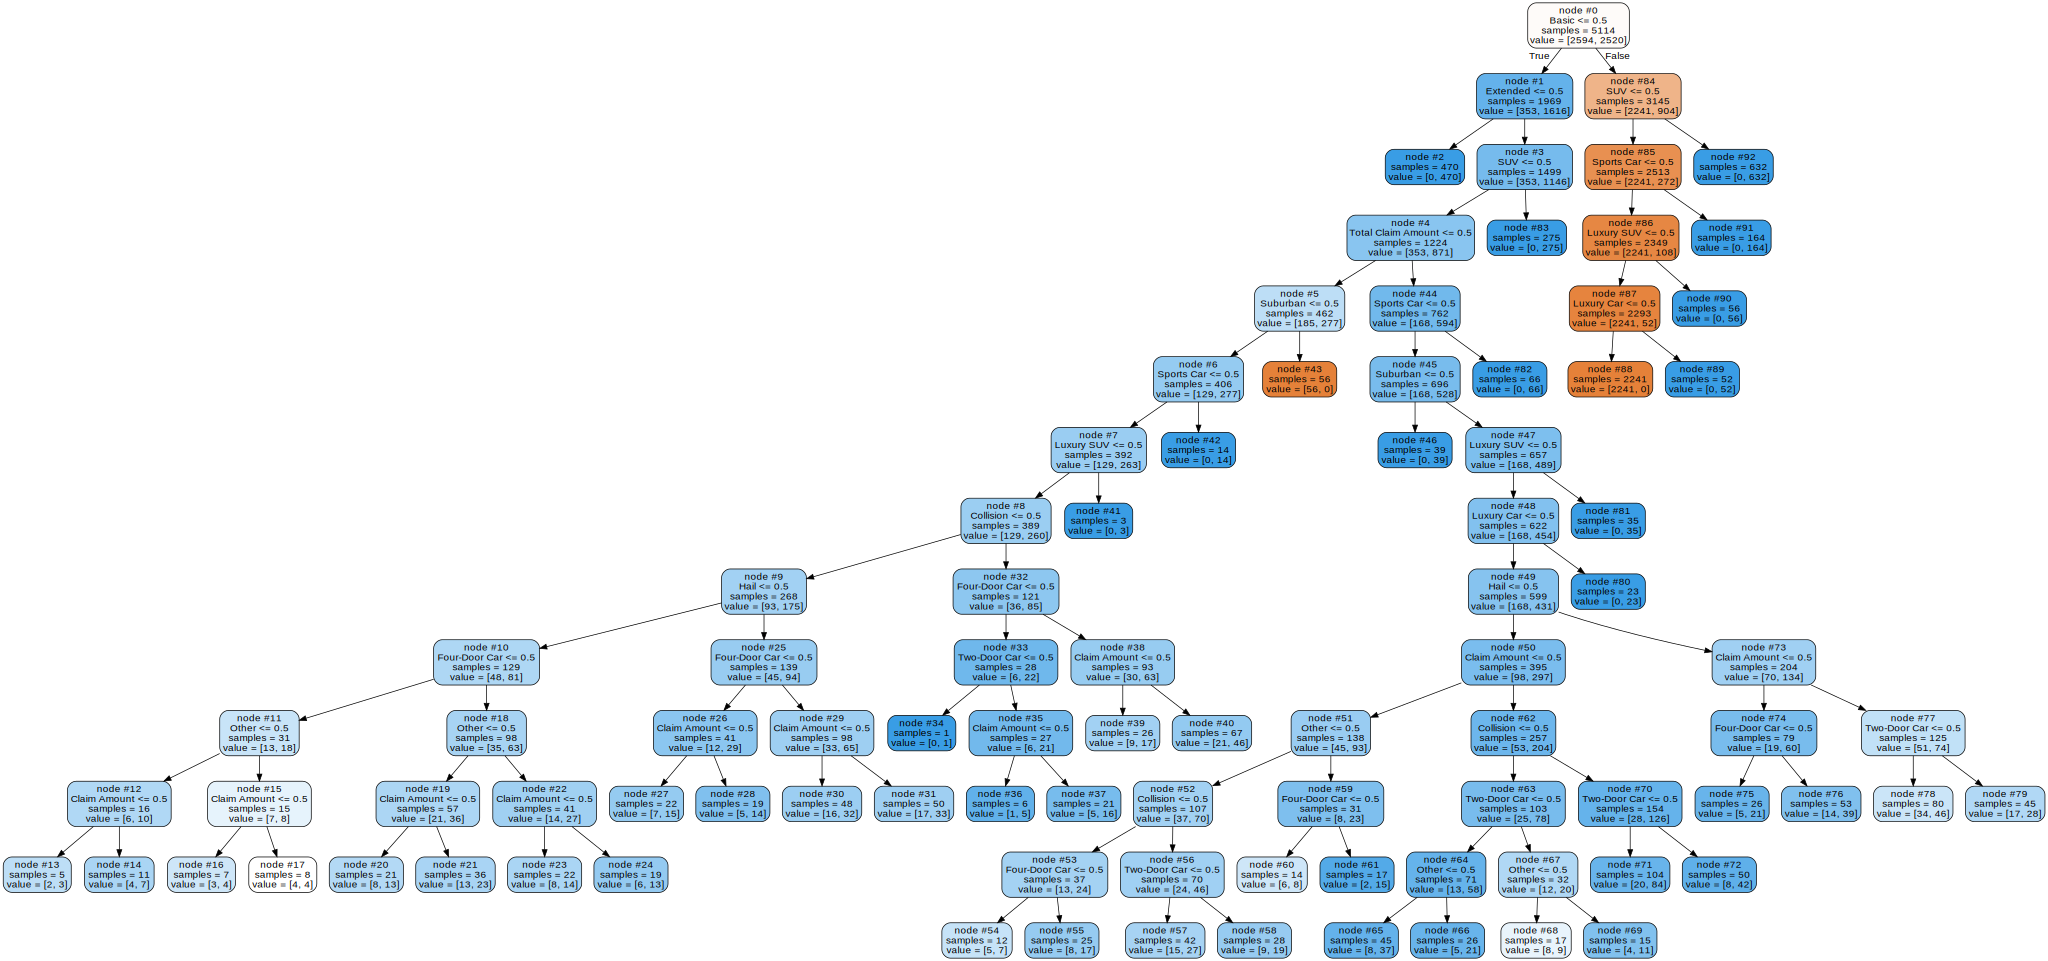

In [250]:
import graphviz 
from sklearn import tree

dt_plot = tree.export_graphviz(insurance_tree_kbest15, out_file = None,
          feature_names=X_kbest_train_15.columns ,
          rounded=True,
          impurity=False,
          filled=True,
          label = 'all',
          proportion = False,
         node_ids = True)
graph = graphviz.Source(dt_plot)
graph

#### The above chart illustrates the path the decision tree would take to try and get to the perfect classification. As we can see from this chart, the model is overfitting and making several splits to try and achieve a perfect classification, which in the end, it does not.

#### The final list of the 15 most important features:

Basic\
SUV	
Total Claim Amount	
Four-Door Car	
Claim Amount	
Extended	
Premium	
Sports Car	
Two-Door Car	
Luxury SUV	
Luxury Car	
Collision	
Hail	
Other\
Suburban	

#### Categories of the important features:

Type of Insurance\
Type of Car\
Total Claim Amount\
Claim Amount\
Type of Claim\
Location Type


Before we do the grid search, we need to perform the same downsizing of the remaining and test set features.

In [251]:
X_kbest_remain_15 = X_remain_OHE.loc[:,kbest15]
X_kbest_test_15 = X_test_OHE.loc[:,kbest15]

## Hyperparameter Optimization

In [252]:
from tempfile import mkdtemp
cachedir = mkdtemp()
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [253]:
#STEP 1: SET UP A PIPELINE OBJECT WITH EACH OF THE PREPROCESSING STEPS AND FINAL MODEL STEP
estimators = [('scale', StandardScaler()),
             ('model', LogisticRegression())]
pipe = Pipeline(estimators, memory = cachedir)

In [254]:
#STEP 2: SET UP THE PARAMETER GRID FOR HYPERPARAMS YOU WANT TO SEARCH ACCROSS

param_grid_Logit = [
    {'model': [LogisticRegression(solver = 'liblinear')],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'model__C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],
    'model__penalty': ['l1','l2']}
]    

In [255]:
param_grid_KNN = [   
    {'model': [KNeighborsClassifier()],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'model__n_neighbors': list(range(1,int(np.sqrt(len(X_train_OHE))),5)),
    'model__weights': ['uniform', 'distance']}
]

In [256]:
param_grid_DT = [  
    {'model': [DecisionTreeClassifier()],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'model__max_depth': list(range(1,int(np.sqrt(len(X_train_OHE))),5)),
    'model__min_samples_leaf': [1,2,4,5,6,7]}
] 

In [257]:
param_grid_LSVC = [   
    {'model': [LinearSVC( max_iter=1000000)],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'model__C': [0.001,0.01,0.1,1,10,100,1000]}
]

In [258]:
#STEP 3: CREATE GRIDSEARCH OBJCT AND FIT
grid_Logit = GridSearchCV(pipe, param_grid=param_grid_Logit, cv=5, n_jobs= None, verbose=5)

In [259]:
grid_KNN = GridSearchCV(pipe, param_grid=param_grid_KNN, cv=5, n_jobs=None, verbose=5)

In [260]:
grid_DT = GridSearchCV(pipe, param_grid=param_grid_DT, cv=5, n_jobs=None, verbose=5)

In [261]:
grid_LSVC = GridSearchCV(pipe, param_grid=param_grid_LSVC, cv=5, n_jobs=None, verbose=5)

In [262]:
fitted_grid_Logit = grid_Logit.fit(X_kbest_train_15,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=MinMaxScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=MinMaxScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=RobustScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=RobustScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=RobustScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=RobustScaler(), score=0.507, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1e-05, model__penalty=l1, scale=RobustScaler() 
[CV]  model=LogisticRegr

[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=StandardScaler(), score=0.919, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler(), score=0.886, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler(), score=0.891, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler(), score=0.901, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.0001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=Lo

[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=MinMaxScaler(), score=0.908, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=MinMaxScaler(), score=0.881, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=MinMaxScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=MinMaxScaler(), score=0.897, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=RobustScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=RobustScaler(), score=0.901, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.001, model__penalty=l2, scale=RobustScaler() 
[CV]  model=LogisticRegr

[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=RobustScaler(), score=0.911, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=RobustScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=RobustScaler(), score=0.930, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=None, score=0.922, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=None, score=0.926, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.01, model__penalty=

[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=RobustScaler(), score=0.937, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None, score=0.934, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None, score=0.935, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None, score=0.952, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=0.1, model__penalty=l2, scale=None, score=0.922, 

[CV]  model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler(), score=0.945, total=   0.1s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler(), score=0.937, total=   0.1s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler(), score=0.951, total=   0.1s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler(), score=0.929, total=   0.1s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(s

[CV]  model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler(), score=0.945, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler(), score=0.937, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler(), score=0.951, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler(), score=0.929, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegr

[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler(), score=0.945, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler(), score=0.937, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler(), score=0.951, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler(), score=0.929, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=Logi

[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None, score=0.945, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None, score=0.937, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None, score=0.951, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None, score=0.929, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000, model__penalty=l2, scale=None, score=0.947, t

[CV]  model=LogisticRegression(solver='liblinear'), model__C=10000, model__penalty=l2, scale=None, score=0.951, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=10000, model__penalty=l2, scale=None, score=0.929, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=10000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=10000, model__penalty=l2, scale=None, score=0.947, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l1, scale=StandardScaler(), score=0.945, total=   0.2s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l1, scale=StandardScaler() 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=1000

[CV]  model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l2, scale=None, score=0.951, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l2, scale=None, score=0.929, total=   0.0s
[CV] model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l2, scale=None 
[CV]  model=LogisticRegression(solver='liblinear'), model__C=100000, model__penalty=l2, scale=None, score=0.947, total=   0.0s


[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:   22.4s finished


In [263]:
fitted_grid_KNN = grid_KNN.fit(X_kbest_train_15,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler() 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler(), score=0.884, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler(), score=0.925, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler(), score=0.911, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler() 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler(), score=0.889, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=StandardScaler(), score=0.920, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler(), score=0.909, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler() 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler(), score=0.920, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler(), score=0.926, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler(), score=0.921, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=MinMaxScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=1, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=1, model_

[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=StandardScaler(), score=0.920, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=StandardScaler(), score=0.890, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=StandardScaler(), score=0.913, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=MinMaxScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors

[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=distance, scale=None, score=0.907, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=6, model__weights=distance, scale=None, score=0.927, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=uniform, scale=StandardScaler(), score=0.931, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=uniform, scale=StandardScaler(), score=0.931, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=un

[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=RobustScaler(), score=0.935, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None, score=0.932, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None, score=0.930, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None, score=0.925, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=11, model__weights=distance, scale=None, score=0.910, total=   

[CV]  model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=RobustScaler(), score=0.936, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=RobustScaler(), score=0.911, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=RobustScaler(), score=0.938, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=None, score=0.929, total=   0.0s
[CV] model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=16, model__weights=dist

[CV]  model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=MinMaxScaler(), score=0.939, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler(), score=0.935, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler(), score=0.942, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=21, model__weights=distance, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_nei

[CV]  model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler(), score=0.930, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler(), score=0.947, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler(), score=0.923, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=26, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_nei

[CV]  model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=StandardScaler(), score=0.942, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=StandardScaler(), score=0.923, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=StandardScaler(), score=0.939, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=MinMaxScaler(), score=0.933, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=31, model__weights=distance, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), mo

[CV]  model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=uniform, scale=None, score=0.935, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler(), score=0.933, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler(), score=0.936, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler(), score=0.942, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=36, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_

[CV]  model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None, score=0.930, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None, score=0.935, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None, score=0.918, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=uniform, scale=None, score=0.935, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=distance, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=41, model__weights=distance, scale=StandardScaler(), score=0.934, to

[CV]  model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=RobustScaler(), score=0.919, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=RobustScaler(), score=0.942, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None, score=0.936, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None, score=0.929, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=46, model__weights=uniform, scale=None, score=0.935

[CV]  model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler(), score=0.928, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler(), score=0.940, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler(), score=0.920, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=RobustScaler(), score=0.939, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=51, model__weights=uniform, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=51, model__

[CV]  model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=MinMaxScaler(), score=0.920, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=MinMaxScaler(), score=0.935, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=RobustScaler(), score=0.936, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=RobustScaler(), score=0.928, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=56, model__weights=uniform, scale=RobustScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=5

[CV]  model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler(), score=0.938, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler(), score=0.927, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler(), score=0.937, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler(), score=0.916, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=61, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=6

[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler(), score=0.941, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler(), score=0.916, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler() 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=StandardScaler(), score=0.932, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=uniform, scale=MinMaxScaler() 
[CV]  model=KNeighborsClassifier(), model_

[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None, score=0.936, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None, score=0.946, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None, score=0.924, total=   0.1s
[CV] model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None 
[CV]  model=KNeighborsClassifier(), model__n_neighbors=66, model__weights=distance, scale=None, score=0.945, total=   0.1s


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   44.4s finished


In [264]:
fitted_grid_DT = grid_DT.fit(X_kbest_train_15,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler(), score=0.750, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler(), score=0.770, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler(), score=0.761, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=Stand

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None, score=0.770, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None, score=0.761, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None, score=0.731, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1, scale=None, score=0.758, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=2, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=2, scale=StandardScaler(),

[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.750, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.770, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.761, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.731, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), mo

[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None, score=0.770, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None, score=0.761, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None, score=0.731, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=7, scale=None, score=0.758, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=1, scale=StandardScaler(),

[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler(), score=0.951, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=StandardScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=4, scale=MinMaxScaler() 
[CV]  model=DecisionTreeCl

[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.951, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), mo

[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=RobustScaler(), score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=RobustScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=None, score=0.938, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf

[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=4, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=4, scale=None, score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler(), score=0.938, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=5, scale=StandardScaler(), score=0.951, total=   0.0s
[CV] model=DecisionTreeClassifier(), mod

[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.939, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.951, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassi

[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=MinMaxScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=2, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None, score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None, score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=5, scale=None, scor

[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler(), score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=1, scale=MinMaxScaler() 
[CV]  model=Decisi

[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=4, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=21, model__min_samples_leaf=6, scale=None 
[CV]  model=DecisionTreeClassifier(), mode

[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None, score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None, score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=1, scale=None, score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=2, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=2, scale=Standard

[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeCl

[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler(), score=0.935, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None, score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None, score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=2, scale=None, scor

[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=StandardScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=31, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=Decisi

[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=4, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=6, scale=None, score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=6, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=6, scale=None, score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=6, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=6, scale=None, score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=7, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=7, scale=StandardScaler(), score=0.935, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=36, model__min_samples_leaf=7, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=36, model__min_sample

[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=StandardScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=MinMaxScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTr

[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=MinMaxScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=RobustScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=RobustScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=None, score=0.935, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=None, score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=41, model__min_samples_leaf

[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=4, scale=StandardScaler() 
[CV]  model=Deci

[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=MinMaxScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=46, model__min_samples_leaf=6, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=RobustScaler(), score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=None, score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=1, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf

[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=5, scale=StandardScaler() 
[CV]  model=Deci

[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=MinMaxScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=51, model__min_samples_leaf=7, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=None, score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=2, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf

[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=56, model__min_samples_leaf=6, scale=MinMaxScaler() 
[CV]  model=Decisi

[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.926, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=MinMaxScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=1, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=RobustScaler(), score=0.945, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=None, score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=None, score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=4, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf

[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler(), score=0.937, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=61, model__min_samples_leaf=7, scale=MinMaxScaler() 
[CV]  model=Decisi

[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=StandardScaler(), score=0.946, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler(), score=0.947, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=2, scale=MinMaxScaler() 
[CV]  model=DecisionTreeClassi

[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler(), score=0.934, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler(), score=0.936, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler(), score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler(), score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=5, scale=RobustScaler() 
[CV]  model=DecisionTreeClassifi

[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=7, scale=None, score=0.949, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=7, scale=None, score=0.925, total=   0.0s
[CV] model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=7, scale=None 
[CV]  model=DecisionTreeClassifier(), model__max_depth=66, model__min_samples_leaf=7, scale=None, score=0.945, total=   0.0s


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:   15.1s finished


In [265]:
fitted_grid_LSVC = grid_LSVC.fit(X_kbest_train_15,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler(), score=0.938, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler(), score=0.933, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler(), score=0.943, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler(), score=0.920, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=StandardScaler(), score=0.942, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None, score=0.920, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None ...
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None, score=0.922, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None ...
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None, score=0.926, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None ...
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None, score=0.908, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None ...
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.001, scale=None, score=0.931, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0.01, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=0.01, scale=StandardScaler(), score=0.945, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=0

[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=StandardScaler(), score=0.951, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=1, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=StandardScaler(), score=0.929, total=   0.1s
[CV] model=LinearSVC(max_iter=1000000), model__C=1, scale=StandardScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=StandardScaler(), score=0.947, total=   0.1s
[CV] model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler(), score=0.945, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler(), score=0.937, total=   0.0s
[CV] model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=1, scale=MinMaxScaler(), score=0.951, total=   0.0s
[CV] mod

[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=MinMaxScaler(), score=0.947, total=   0.7s
[CV] model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler(), score=0.945, total=   0.6s
[CV] model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler(), score=0.937, total=   0.6s
[CV] model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler(), score=0.951, total=   0.7s
[CV] model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler(), score=0.929, total=   0.8s
[CV] model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler() 
[CV]  model=LinearSVC(max_iter=1000000), model__C=100, scale=RobustScaler(), score=0.947, total=   0

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.7min finished


In [268]:
print(f' Best Logistic Model Params: {fitted_grid_Logit.best_estimator_}\n')
print(f' Best KNN Model Params: {fitted_grid_KNN.best_estimator_}\n')
print(f' Best DT Model Params: {fitted_grid_DT.best_estimator_}\n')
print(f' Best LSVC Model Params: {fitted_grid_LSVC.best_estimator_}\n')

 Best Logistic Model Params: Pipeline(memory='/var/folders/xc/2bb9kb2j4yl6sjg90bb655s40000gn/T/tmp1ehbmqux',
         steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

 Best KNN Model Params: Pipeline(memory='/var/folders/xc/2bb9kb2j4yl6sjg90bb655s40000gn/T/tmp1ehbmqux',
         steps=[('scale', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=21, weights='distance'))])

 Best DT Model Params: Pipeline(memory='/var/folders/xc/2bb9kb2j4yl6sjg90bb655s40000gn/T/tmp1ehbmqux',
         steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=6))])

 Best LSVC Model Params: Pipeline(memory='/var/folders/xc/2bb9kb2j4yl6sjg90bb655s40000gn/T/tmp1ehbmqux',
         steps=[('scale', StandardScaler()),
                ('model', LinearSVC(C=0.01, max_iter=1000000))])



In [269]:
print(f' Best Logistic Model Params: {fitted_grid_Logit.best_score_}\n')
print(f' Best KNN Model Params: {fitted_grid_KNN.best_score_}\n')
print(f' Best DT Model Params: {fitted_grid_DT.best_score_}\n')
print(f' Best SVM Model Params: {fitted_grid_LSVC.best_score_}\n')

 Best Logistic Model Params: 0.9419251539445972

 Best KNN Model Params: 0.9374283839595373

 Best DT Model Params: 0.9411431402593576

 Best SVM Model Params: 0.9419251539445972



In [270]:
'''
Scale Data for comparison
'''
# Scale data
scaler_kbest15 = StandardScaler()
scaler_kbest15.fit(X_kbest_train_15)
X_kbest_train15_scaled = scaler_kbest15.transform(X_kbest_train_15)
X_kbest_validation15_scaled = scaler_kbest15.transform(X_kbest_validation_15)

insurance_logit_kbest15s = LogisticRegression(C=0.1, solver = 'liblinear', penalty = 'l1', random_state = 42)
insurance_logit_kbest15s.fit(X_kbest_train15_scaled,y_train)
print(f'Score on Scaled Train: {insurance_logit_kbest15s.score(X_kbest_train15_scaled, y_train)}')
print(f'Score on Scaled Validation: {insurance_logit_kbest15s.score(X_kbest_validation15_scaled, y_validation)}')

Score on Scaled Train: 0.9419241298396559
Score on Scaled Validation: 0.93296853625171


In [271]:
insurance_logit_kbest15t = LogisticRegression(C=0.1, solver = 'liblinear', penalty = 'l1', random_state = 42)
insurance_logit_kbest15t.fit(X_kbest_train_15,y_train)
print(f'Score on Train: {insurance_logit_kbest15t.score(X_kbest_train_15, y_train)}')
print(f'Score on Validation: {insurance_logit_kbest15t.score(X_kbest_validation_15, y_validation)}')

Score on Train: 0.9419241298396559
Score on Validation: 0.93296853625171


## Final Model
The best score achieved after 5 fold cross-validation for each model completed was from the logistic regression model. Therefore this model and the hyperparameter optimizations will be used for this model.

The best result was achieved with Standard Scaler and hyperparamaters (C= 0.1, penalty = l1, solver = liblinear). The Score with and without the scaler are the same so the final model will not include the scaler

In [272]:
insurance_logit_final = LogisticRegression(C= 0.1, penalty = 'l1', solver = 'liblinear',random_state = 42)
insurance_logit_final.fit(X_kbest_remain_15,y_remain)
print(f'Score on remain: {insurance_logit_final.score(X_kbest_remain_15, y_remain):0.03f}')
print(f'Score on test: {insurance_logit_final.score(X_kbest_test_15, y_test):0.03f}')

Score on remain: 0.939
Score on test: 0.940


In [273]:
# Show confusion matrix
y_pred_final = insurance_logit_final.predict(X_kbest_test_15)

confusion_matrix(y_test, y_pred_final)

array([[817, 110],
       [  0, 900]])

|    |  Predicted Low Premium  |   Predicted High Premium  | 
| --------- |:---:|:---:|
|True Low Premium |817 | 110 | 
|True High Premium |0 |900 | 

In [274]:
report_final = classification_report(y_test, y_pred_final)
print(report_final)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       927
           1       0.89      1.00      0.94       900

    accuracy                           0.94      1827
   macro avg       0.95      0.94      0.94      1827
weighted avg       0.95      0.94      0.94      1827



#### This result is positive and is aligned with what we would want from a quote perspective. We can see that all True High Premiums are predicted as High Premiums from the confusion matrix above. This means that all the people who should have high premiums are actually given high premiums. 11% of the Predicted High Premiums are True Low Premiums; this means that people who should have low premiums have high premiums. The downside to this is that there are individuals who are paying higher premiums than they should. This could possibly result in losing customers to insurers with lower premiums.

## Model Results

In [275]:
insurance_knn_final = KNeighborsClassifier(n_neighbors = 21, weights = 'distance')
insurance_knn_final.fit(X_kbest_remain_15,y_remain)
print(f'Score on remain: {insurance_knn_final.score(X_kbest_remain_15, y_remain):0.03f}')
print(f'Score on test: {insurance_knn_final.score(X_kbest_test_15, y_test):0.03f}')

Score on remain: 0.939
Score on test: 0.938


In [276]:
y_predknn_final = insurance_knn_final.predict(X_kbest_test_15)

confusion_matrix(y_test, y_predknn_final)

array([[817, 110],
       [  3, 897]])

In [277]:
report_final_KNN = classification_report(y_test, y_predknn_final)
print(report_final_KNN)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       927
           1       0.89      1.00      0.94       900

    accuracy                           0.94      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.94      0.94      1827



In [278]:
insurance_DT_final = DecisionTreeClassifier(max_depth = 6)
insurance_DT_final.fit(X_kbest_remain_15,y_remain)
print(f'Score on remain: {insurance_DT_final.score(X_kbest_remain_15, y_remain):0.03f}')
print(f'Score on test: {insurance_DT_final.score(X_kbest_test_15, y_test):0.03f}')

Score on remain: 0.939
Score on test: 0.940


In [280]:
y_predDT_final = insurance_DT_final.predict(X_kbest_test_15)

confusion_matrix(y_test, y_predDT_final)

array([[817, 110],
       [  0, 900]])

In [281]:
report_final_DT = classification_report(y_test, y_predDT_final)
print(report_final_DT)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       927
           1       0.89      1.00      0.94       900

    accuracy                           0.94      1827
   macro avg       0.95      0.94      0.94      1827
weighted avg       0.95      0.94      0.94      1827



In [282]:
insurance_LSVC_final = LinearSVC(C = 0.01, max_iter = 1000000)
insurance_LSVC_final.fit(X_kbest_remain_15,y_remain)
print(f'Score on remain: {insurance_LSVC_final.score(X_kbest_remain_15, y_remain):0.03f}')
print(f'Score on test: {insurance_LSVC_final.score(X_kbest_test_15, y_test):0.03f}')

Score on remain: 0.939
Score on test: 0.940


In [283]:
y_predLSVC_final = insurance_LSVC_final.predict(X_kbest_test_15)

confusion_matrix(y_test, y_predLSVC_final)

array([[817, 110],
       [  0, 900]])

In [284]:
report_final_LSVC = classification_report(y_test, y_predLSVC_final)
print(report_final_LSVC)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       927
           1       0.89      1.00      0.94       900

    accuracy                           0.94      1827
   macro avg       0.95      0.94      0.94      1827
weighted avg       0.95      0.94      0.94      1827



['Basic', 'SUV', 'Total Claim Amount', 'Four-Door Car', 'Claim Amount', 'Extended', 'Premium', 'Sports Car', 'Two-Door Car', 'Luxury SUV', 'Luxury Car', 'Collision', 'Hail', 'Other', 'Suburban']


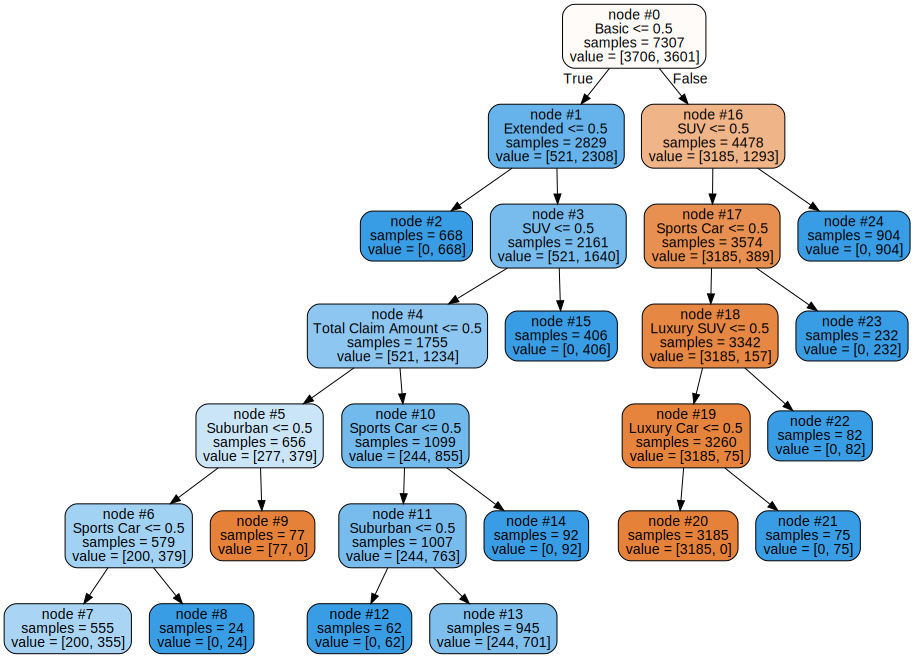

In [293]:

print(list(kbest_table.sort_values(by = 'KBest', ascending = False).head(15)[0].values)) 

dt_plot = tree.export_graphviz(insurance_DT_final, out_file = None,
          feature_names=X_kbest_train_15.columns ,
          rounded=True,
          impurity=False,
          filled=True,
          label = 'all',
          proportion = False,
         node_ids = True)
graph = graphviz.Source(dt_plot)
graph

#### In the end, all the models returned the same precision, recall, and accuracy scores. Although all the scores were the same, the KNN model's confusion matrix was slightly worse than the rest. In addition, the SVC model took much longer than any other model to fit and should therefore be counted out also. Logistic regression or Decision Tree can be chosen. Since the decision tree can visualize its path to reach its final determination, This model will be chosen. The above chart is similar to the one found in the Feature Selection Method section except that it terminates at a depth of 6.¶

## Conclusion

**Q1. )** What columns from this data set are most predictive of premium amounts?

Using the KBest Scoring method as well as a trial and error based on scoring, we were able to determine that the top 15 features were most predictive of premium amounts, with the top unique being Basic/Extended/Premium Insurance and Type of Vehicle, Total Claim Amount, and Suburban driving.

**Q2. )** Can we use ML to determine which demographic of people are more likely to have higher premiums?

Using either the logistic regression model or the Decision Tree Model, we can predict to 94% accuracy the demographic of people most likely to have higher premiums.